# FIT5149 S1 2019 Assessment 1: Choosing and Explaining Likely Caravan Insurance Customers


Student information
- Family Name: Tan
- Given Name: Kah Wang
- Student ID: 29442826
- Student email: ktan0032@student.monash.edu

Programming Language: R 3.5.3 in Jupyter Notebook

R Libraries used:
- psych
- ggplot2
- dplyr
- lattice
- gridExtra
- caret
- leaps
- glmnet
- pROC
- car
- MASS
- cvTools

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

This notebook contains the results of the data analysis performed on a set of customer data collected by the car insurance company. The aim of the data analysis is to build a linear regression model from the customer data that can be used to help the company implement a targeted marketing strategy.

There are two main tasks in this assignment. Firstly, we are required to predict a set of 800 customers in a test data that are most likely to purchase mobile home policies based on our training data. Secondly, we are required to describe why certain group of customers are more likely to have a mobile home policy, which will be particularly useful for marketing purposes.

In Section 2, we first perform exploratory data analysis (EDA) to explore and understand the customer data. We then understand the correlation between different variables in the dataset. Visual explorations were intensively used in this section as well to understand mobile home policy customers socio-demographic and product-ownership.

Then in Section 3, we first perform feature selection on the predictor variables to identify those that are significant in explaining our target variable. We then develop three model types - Logistic Regression, Linear Discriminant Analysis and Quadratic Discriminant Analysis to help us with our prediction task. For each model type, a number of different models were fitted and developed using variables identified by different feature selection methods, as well as the consideration of interaction effects between predictor variables. Analysis and interpretation of each sub-model was also carried out. 

In Section 4, we compare the three main models and all the sub-models under the three and determine which was the best model to help us with the prediction task. We then used the testing dataset given to us and predicted a set of 800 customers who are most likely mobile home policy owners and comparing our predictions to the actual data which contained information on whether these customers indeed were mobile home policy customers or not.

In Section 5, we answered the description task by looking mainly at the 3 sections - EDA, Feature Selection, Model Development. Combining the observations from the 3 sections allow us to draw meaningful and moderately accurate recommendations as to why customers have a caravan insurance policy and how these customers are different from other customers.

Three datasets were provided for the assignment - TICDATA2000.txt, TICEVAL2000.txt and TICTGTS2000.txt. The exploratory data analysis and the model building were done using the TICDATA2000.txt dataset. TICEVAL2000.txt was only used to test the models and TICTGTS2000.txt contained the true data of whether customers in the testing dataset indeed bought mobile home policy or not.

In [1]:
library(psych) # for plotting
library(ggplot2) # for plotting
library(dplyr) # for data manipulation
library(lattice) # for plotting
library(gridExtra) # for plotting
library(caret) # confusion matrix
library(leaps) # for forward/backward stepwise selection
library(glmnet) # for lasso regularisation
library(pROC) # plotting of ROC curve
library(car) # for Variable InF
library(MASS) # for LDA
library(cvTools) # for k-fold cross validation


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lattice' was built under R version 3.5.3"Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'caret' was built under R version 3.5.3"Warning message:
"package 'leaps' was built under R version 3.5.3"Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.3"Loaded glmnet 2.0-16

Warning message:
"package 'pROC' was bu

## 2. Data Exploration<a class="anchor" id="sec_2"></a>
### 2.1 Overall Data Statistics

In [2]:
# Load the training dataset
trainData <- read.delim("ticdata2000.txt", header = FALSE, sep = "\t")

In [3]:
# Display the dimensions
cat("The customer dataset has", dim(trainData)[1], "records, each with", dim(trainData)[2],
    "attributes.\nThe structure is:\n\n")

# Display the structure
str(trainData)

cat("\nThe first 10 records in the dataset are:")
# Inspect the first 10 records
head(trainData)

The customer dataset has 5822 records, each with 86 attributes.
The structure is:

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(trainData)


Basic statistics for each attribute are:

       V1              V2               V3              V4       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       V5               V6               V7              V8      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
       V9             V10             V11              V12      
 Min.   :0.

In [5]:
cat("\nStatistical description for each attribute are:")
# Statistical description
round(describe(trainData),3)[1:30,]
round(describe(trainData),3)[31:60,]
round(describe(trainData),3)[61:86,]


Statistical description for each attribute are:

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,5822,24.253,12.847,30,24.984,11.861,1,41,40,-0.435,-1.353,0.168
V2,2,5822,1.111,0.406,1,1.000,0.000,1,10,9,7.416,99.985,0.005
V3,3,5822,2.679,0.790,3,2.645,1.483,1,5,4,0.183,0.011,0.010
V4,4,5822,2.991,0.815,3,2.951,0.000,1,6,5,0.472,0.619,0.011
V5,5,5822,5.774,2.857,7,5.901,2.965,1,10,9,-0.331,-1.345,0.037
V6,6,5822,0.696,1.003,0,0.521,0.000,0,9,9,2.237,8.617,0.013
V7,7,5822,4.627,1.716,5,4.633,1.483,0,9,9,0.074,0.454,0.022
V8,8,5822,1.070,1.018,1,0.957,1.483,0,5,5,0.902,0.788,0.013
V9,9,5822,3.259,1.598,3,3.321,1.483,0,9,9,-0.131,-0.032,0.021
V10,10,5822,6.183,1.909,6,6.328,1.483,0,9,9,-0.719,0.681,0.025


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V31,31,5822,4.772,3.090,5,4.840,4.448,0,9,9,-0.158,-1.305,0.040
V32,32,5822,6.040,1.553,6,6.042,1.483,0,9,9,-0.237,0.619,0.020
V33,33,5822,1.316,1.203,1,1.175,1.483,0,7,7,0.774,0.309,0.016
V34,34,5822,1.959,1.600,2,1.828,1.483,0,9,9,0.728,0.863,0.021
V35,35,5822,6.277,1.979,7,6.448,1.483,0,9,9,-0.687,0.202,0.026
V36,36,5822,2.729,1.982,2,2.559,1.483,0,9,9,0.678,0.177,0.026
V37,37,5822,2.574,2.086,2,2.388,2.965,0,9,9,0.597,-0.168,0.027
V38,38,5822,3.536,1.883,4,3.528,1.483,0,9,9,0.180,0.171,0.025
V39,39,5822,2.731,1.928,3,2.610,1.483,0,9,9,0.664,0.709,0.025
V40,40,5822,0.796,1.163,0,0.564,0.000,0,9,9,1.908,4.756,0.015


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V61,61,5822,0.019,0.273,0,0.000,0.000,0,6,6,15.911,269.398,0.004
V62,62,5822,0.025,0.157,0,0.000,0.000,0,1,1,6.051,34.618,0.002
V63,63,5822,0.016,0.205,0,0.000,0.000,0,6,6,16.646,330.208,0.003
V64,64,5822,0.048,0.409,0,0.000,0.000,0,5,5,8.824,78.186,0.005
V65,65,5822,0.403,0.493,0,0.377,0.000,0,2,2,0.421,-1.754,0.006
V66,66,5822,0.015,0.134,0,0.000,0.000,0,5,5,14.330,365.232,0.002
V67,67,5822,0.021,0.142,0,0.000,0.000,0,1,1,6.746,43.522,0.002
V68,68,5822,0.562,0.605,1,0.514,1.483,0,7,7,0.977,3.612,0.008
V69,69,5822,0.010,0.130,0,0.000,0.000,0,4,4,16.726,354.308,0.002
V70,70,5822,0.041,0.229,0,0.000,0.000,0,8,8,10.946,268.084,0.003


In [109]:
cat("\nNumber of NA values for each attribute:")
# Return no. of NA values for each attribute
colSums(is.na(trainData))


Number of NA values for each attribute:

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 V86 
  0   0   0   0   0   0

As shown, there are actually no missing data in this dataset.

As mentioned in the assignment description, there are 86 attributes (columns) in which attributes 1 - 43 contains socio-demographic data and attributes 44 - 86 contains product ownership, with attribute 86: Number of mobile home policies being the target variable for our linear regression model. It was further mentioned all attributes have been discretised. It was also mentioned that attribute 1 - 43 are assigned based on the zip code the customers stay in.

As seen in the dataset, each attribute has been represented by a "V" followed by it's attribute number. <br>
The details of the attributes on what they stands for are as follows (obtained from <a href="http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html">here</a>):

1 Customer Subtype see L0 <br>
2 Number of houses 1 – 10 <br>
3 Avg size household 1 – 6 <br>
4 Avg age see L1 <br>
5 Customer main type see L2 <br>
6 Roman catholic see L3 <br>
7 Protestant <br>
8 Other religion <br>
9 No religion <br>
10 Married <br>
11 Living together <br>
12 Other relation <br>
13 Singles <br>
14 Household without children <br>
15 Household with children <br>
16 High level education <br>
17 Medium level education <br>
18 Lower level education <br>
19 High status <br>
20 Entrepreneur <br>
21 Farmer <br>
22 Middle management <br>
23 Skilled labourers <br>
24 Unskilled labourers <br>
25 Social class A <br>
26 Social class B1 <br>
27 Social class B2 <br>
28 Social class C <br>
29 Social class D <br>
30 Rented house <br>
31 Home owners <br>
32 1 car <br>
33 2 cars <br>
34 No car <br>
35 National Health Service <br>
36 Private health insurance <br>
37 Income < 30.000 <br>
38 Income 30-45.000 <br>
39 Income 45-75.000 <br>
40 Income 75-122.000 <br>
41 Income >123.000 <br>
42 Average income <br>
43 Purchasing power class <br>
44 Contribution private third party insurance see L4 <br>
45 Contribution third party insurance (firms)  <br>
46 Contribution third party insurane (agriculture) <br>
47 Contribution car policies <br>
48 Contribution delivery van policies <br>
49 Contribution motorcycle/scooter policies <br>
50 Contribution lorry policies <br>
51 Contribution trailer policies <br>
52 Contribution tractor policies <br>
53 Contribution agricultural machines policies <br> 
54 Contribution moped policies <br>
55 Contribution life insurances <br>
56 Contribution private accident insurance policies <br>
57 Contribution family accidents insurance policies <br>
58 Contribution disability insurance policies <br>
59 Contribution fire policies <br>
60 Contribution surfboard policies <br>
61 Contribution boat policies <br>
62 Contribution bicycle policies <br>
63 Contribution property insurance policies <br>
64 Contribution social security insurance policies <br>
65 Number of private third party insurance 1 - 12 <br>
66 Number of third party insurance (firms)  <br>
67 Number of third party insurane (agriculture) <br>
68 Number of car policies <br>
69 Number of delivery van policies <br>
70 Number of motorcycle/scooter policies <br>
71 Number of lorry policies <br>
72 Number of trailer policies <br>
73 Number of tractor policies <br>
74 Number of agricultural machines policies <br>
75 Number of moped policies <br>
76 Number of life insurances <br>
77 Number of private accident insurance policies <br>
78 Number of family accidents insurance policies <br>
79 Number of disability insurance policies <br>
80 Number of fire policies <br>
81 Number of surfboard policies <br>
82 Number of boat policies <br>
83 Number of bicycle policies <br>
84 Number of property insurance policies <br>
85 Number of social security insurance policies <br>
86 Number of mobile home policies 0 - 1

#### Summary of Initial Observations of Attributes

|Attribute  |Type       |Sub-type  |Comments                                                                           |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|V1         |Categorical|Nominal   |Mean is around group 24 and 25 which represents young, low educated or young seniors in the city.|
|V2      |Numerical  |Discrete|Highly right skewed as 3rd quartile is 1.0 while max is 10.0.| 
|V3     |Numerical  |Discrete|Average household size is 2.6.| 
|V4    |Categorical  |Ordinal  |Values range from 1 to 6. Mean is 3 which represents 40-50 years.                              
|V5  |Categorical  |Nominal  |Mean is group 5 and 6 which represents those living well or cruising seniors.|
|V6-V9|Categorical  |Ordinal|Represents Religion Status. Protestant and No religion are the highest.|
|V10-V13   |Categorical  |Ordinal|Represents Marital Status. Status Married is most common.|
|V14-V15 |Categorical|Ordinal   |Represents number of children. Household without children are more common.  |
|V16-V18  |Categorical|Ordinal   |Represents education level. Lower level education are more common, followed by medium level.|
|V19-V24     |Categorical|Ordinal   |Represents Occupation Level. Middle management and unskilled labourers more common.|
|V25-V29   |Categorical |Ordinal  |Represents Social Class. Social Class C dominates followed by Social Class B2.|
|V30-V31    |Categorical|Ordinal  |Represents Property Ownership. Roughly even between home owners and rented house.|
|V32-V34   |Categorical |Ordinal  |Represents number of car owns. Majority has 1 car.|
|V35-V36   |Categorical |Ordinal  |Represents insurance type. Majority bought National Health Insurance.|
|V37-V41   |Categorical |Ordinal  |Represents income. Most are earning >$30000-$45000, followed by <$30000.|
|V42   |Categorical |Ordinal  |37-49% are drawing average income.|
|V43   |Categorical |Ordinal  |37-49% are in the purchasing power class.|
|V44   |Categorical |Ordinal  |On average, people are contributing to private 3rd party insurance. We expect this variable to be highly correlated to V36.|
|V45-V46   |Categorical |Ordinal  |More are contributing to agriculture 3rd party insurance. Highly right skewed distribution for 3rd party firms insurance.|
|V47-V64   |Categorical |Ordinal  |Car policies contribution are the highest followed by fire policies. Highly right skewed distribution for most of these attributes.|
|V65-V85   |Numerical |Discrete  |Car policies and fire policies are most common. These attributes are expected to be highly correlated to those in V47-V64.|
|V86   |Numerical |Discrete  |Target attribute and those who owe mobile home policy only bought 1. Mean is low at 0.06.|

In [7]:
cat("\nNumber of customers who bought mobile home policies in this training dataset:")
# Return no. of V86 not equal 0
nrow(trainData[trainData$V86==1,])
cat("\nPercentage of customers who bought mobile home policies in this training dataset:")
# Return % of V86 not equal 0
(nrow(trainData[trainData$V86==1,])/nrow(trainData))*100


Number of customers who bought mobile home policies in this training dataset:

[1] 348


Percentage of customers who bought mobile home policies in this training dataset:

[1] 5.977327

There are only about 6% of customers out of 5822 in this training dataset that actually bought mobile home policies.

### 2.2 Correlation between variables
We proceed to explore possible correlation between variables in our exploratory data analysis.

In [9]:
cat("\nCorrelation Coefficients of each attribute against all other attributes:")
# Return correlation coefficients of each attribute against all other attributes in the dataset
cor(trainData)


Correlation Coefficients of each attribute against all other attributes:

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
V1,1.000000000,-0.038721258,-0.021996966,0.009454422,0.992671874,-0.193613010,0.09039908,-0.025642336,-0.019504734,-0.065595774,...,0.0217073867,-0.0120597787,-0.0029094232,-0.0115121130,0.0078009434,-0.0181616379,-0.015773558,-0.0210874196,-0.053717567,-0.069385237
V2,-0.038721258,1.000000000,0.010102243,0.056974604,-0.045816774,-0.006136360,-0.02436018,0.012056027,0.020540166,0.023024578,...,0.0033205607,0.0094435174,-0.0163329939,0.0006545495,-0.0061891407,0.0006662173,-0.020993273,0.0183037932,-0.004166222,-0.009809028
V3,-0.021996966,0.010102243,1.000000000,-0.328257249,0.016115371,0.013105189,0.04935646,-0.108649617,-0.005527394,0.534797785,...,-0.0001283250,0.0167597277,0.0187492290,-0.0092689689,0.0092343649,0.0006443739,0.030330056,0.0259066857,0.028383762,0.035573157
V4,0.009454422,0.056974604,-0.328257249,1.000000000,0.003872334,-0.037518737,0.09365402,0.057737161,-0.119966338,-0.040383808,...,0.0210701969,-0.0017470283,0.0006444196,0.0244168979,0.0002441930,-0.0017913964,0.020611609,-0.0200420361,-0.014539744,0.004490697
V5,0.992671874,-0.045816774,0.016115371,0.003872334,1.000000000,-0.199186199,0.09849256,-0.034565811,-0.021465787,-0.026618553,...,0.0239757042,-0.0100041462,-0.0022434628,-0.0123720038,0.0070986454,-0.0206830450,-0.017990254,-0.0209970072,-0.051723141,-0.069299830
V6,-0.193613010,-0.006136360,0.013105189,-0.037518737,-0.199186199,1.000000000,-0.37276739,0.021125102,-0.063904415,-0.028594440,...,-0.0084496474,0.0053862951,-0.0128432499,0.0019283957,-0.0006751743,0.0117945560,-0.001502914,-0.0114309114,-0.004008778,0.006225424
V7,0.090399085,-0.024360178,0.049356463,0.093654020,0.098492561,-0.372767392,1.00000000,-0.317548571,-0.741894511,0.147256295,...,-0.0143545843,0.0039492314,0.0039747163,0.0463522124,0.0137600087,0.0184678037,0.001906471,0.0023918343,0.016657867,0.032866330
V8,-0.025642336,0.012056027,-0.108649617,0.057737161,-0.034565811,0.021125102,-0.31754857,1.000000000,-0.139306355,-0.125703467,...,0.0065716077,-0.0055693135,0.0176955827,0.0063015379,-0.0238772539,0.0094173615,0.025661055,-0.0097344391,0.010127307,0.004039404
V9,-0.019504734,0.020540166,-0.005527394,-0.119966338,-0.021465787,-0.063904415,-0.74189451,-0.139306355,1.000000000,-0.107899577,...,0.0088443705,0.0042418594,-0.0041392047,-0.0526046474,-0.0084119000,-0.0264073491,-0.011121966,0.0072612796,-0.027291255,-0.041706886
V10,-0.065595774,0.023024578,0.534797785,-0.040383808,-0.026618553,-0.028594440,0.14725629,-0.125703467,-0.107899577,1.000000000,...,0.0115124386,0.0223758364,0.0116780108,-0.0079785097,0.0097105773,-0.0015655294,0.020921355,-0.0034195098,0.036568846,0.070263828



Level Plot of correlation coefficients of each attribute against all other attributes in the datset:

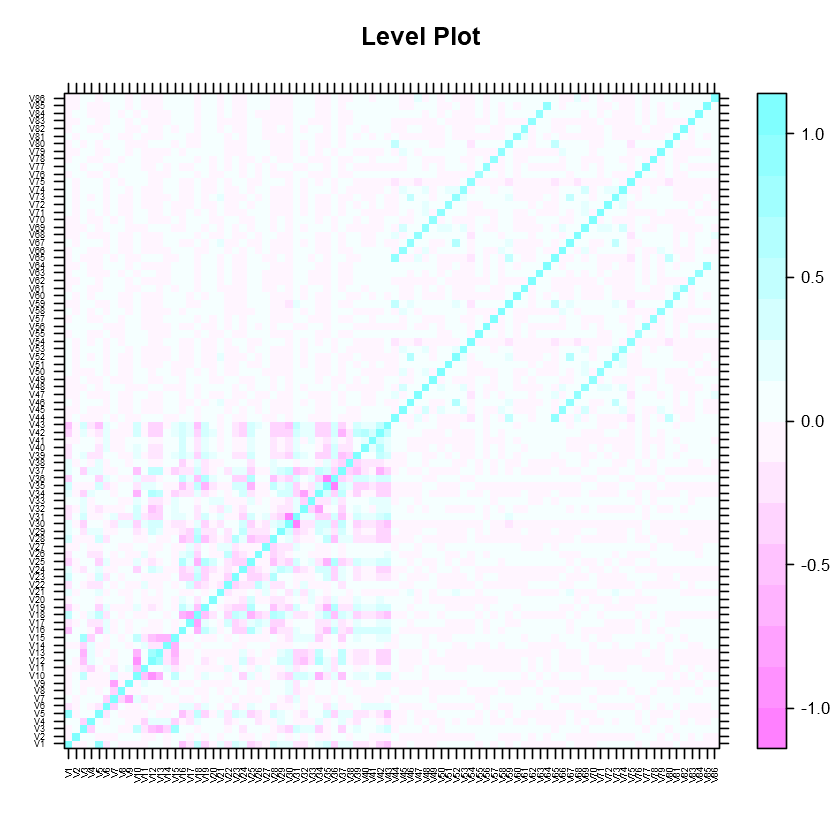

In [10]:
cat("\nLevel Plot of correlation coefficients of each attribute against all other attributes in the datset:")
# Return levelplot correlation coefficients of each attribute against all other attributes in the dataset
levelplot(cor(trainData),scales = list(x=list(rot=90,cex=0.4),y=list(cex=0.4)), main="Level Plot",xlab="",ylab="")

From the correlation coefficient matrix and the level plot above, we can see there are some correlated variables in which the correlation coefficient is quite significant. It will be useful to identify them as we can study the interaction effects of these variables between each other and see if adding the interaction effects will affect our training model. <br><br>
However with the correlation coefficient matrix and levelplot, it makes it hard to identify the variables that exhibit high correlation.<br><br>
We make use of a loop to identify those variables that have high correlation between them, by filtering the correlation coefficient to be <-0.5 or >0.5.

In [12]:
# loop to help us identify those variables with high correlation (>0.5 or <-0.5)
for (i in 1:ncol(trainData)){
    if ((length(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])>0.5,])>0) | (length(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])<(-0.5),])>0)) {
        cat("V",i," is correlated to: \n")
        if (length(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])>0.5,])>0){
            print(names(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])>0.5,]))
            print(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])>0.5,])
        }
        if (length(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])<(-0.5),])>0){
            print(names(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])<(-0.5),]))
            print(cor(trainData[,-i],trainData[,i])[cor(trainData[,-i],trainData[,i])<(-0.5),])
        }
    }
}

V 1  is correlated to: 
[1] "V5"  "V18"
       V5       V18 
0.9926719 0.5256780 
[1] "V43"
       V43 
-0.5678071 
V 3  is correlated to: 
[1] "V10" "V15"
      V10       V15 
0.5347978 0.7940142 
[1] "V12" "V13"
       V12        V13 
-0.5007347 -0.6595528 
V 5  is correlated to: 
[1] "V1"  "V18"
       V1       V18 
0.9926719 0.5240617 
[1] "V43"
       V43 
-0.5363374 
V 7  is correlated to: 
[1] "V9"
        V9 
-0.7418945 
V 9  is correlated to: 
[1] "V7"
        V7 
-0.7418945 
V 10  is correlated to: 
[1] "V3"  "V15"
       V3       V15 
0.5347978 0.5003537 
[1] "V12" "V13" "V34"
       V12        V13        V34 
-0.8843619 -0.6842333 -0.6100175 
V 12  is correlated to: 
[1] "V13" "V34"
      V13       V34 
0.7456423 0.6614576 
[1] "V3"  "V10"
        V3        V10 
-0.5007347 -0.8843619 
V 13  is correlated to: 
[1] "V12" "V34"
      V12       V34 
0.7456423 0.5161736 
[1] "V3"  "V10" "V15"
        V3        V10        V15 
-0.6595528 -0.6842333 -0.6273474 
V 14  is correlated

|Attribute 1 |Attribute 2|Correlation Coefficient|
|------------|-----------|-----------------------|
|V1 - Customer Subtype       |V5 - Customer main type|0.993 |
|V1 - Customer Subtype       |V18 - Lower level education|0.526 |
|V1 - Customer Subtype       |V43 - Purchasing power class|-0.568 |
|V3 - Avg size household        |V10 - Married |0.535 |
|V3 - Avg size household        |V12 - Other Relation |-0.501 |
|V3 - Avg size household        |V13 - Singles |-0.660 |
|V3 - Avg size household        |V15 - Household with children |0.794 |
|V5 - Customer main type        |V18 - Lower level education|0.524 |
|V5 - Customer main type        |V43 - Purchasing power class|-0.536 |
|V7 - Protestant        |V9 - No religion|-0.742 |
|V10 - Married      |V12 - Other relation |-0.884 |
|V10 - Married      |V13 - Singles|-0.684 |
|V10 - Married      |V15 - Household with children|0.500 |
|V10 - Married      |V34 - No car|-0.610 |
|V12 - Other relation     |V13 - Singles|0.746 |
|V12 - Other relation     |V34 - No car|0.661 |
|V13 - Singles     |V15 - Household with children|-0.627 |
|V13 - Singles     |V34 - No car|0.516 |
|V14 - Household without children     |V15 - Household with children|-0.591 |
|V16 - High level education     |V18 - Lower level education|-0.639 |
|V16 - High level education     |V19 - High status|0.560 |
|V16 - High level education     |V25 - Social class A|0.694 |
|V16 - High level education     |V28 - Social class C|-0.525 |
|V16 - High level education     |V35 - National Health Service|-0.521 |
|V16 - High level education     |V36 - Private health insurance|0.518 |
|V17 - Medium level education     |V18 - Lower level education|-0.748 |
|V18 - Lower level education  |V25 - Social class A|-0.592 |
|V18 - Lower level education  |V28 - Social class C|0.631 |
|V18 - Lower level education     |V35 - National Health Service|0.512 |
|V18 - Lower level education     |V36 - Private health insurance|-0.514 |
|V19 - High status     |V25 - Social class A|0.693 |
|V19 - High status     |V28 - Social class C|-0.536 |
|V19 - High status     |V35 - National Health Service|-0.613 |
|V19 - High status     |V36 - Private health insurance|0.614 |
|V22 - Middle management     |V26 - Social class B1|0.523 |
|V23 - Skilled labourers    |V28 - Social class C|0.612 |
|V25 - Social class A    |V28 - Social class C|-0.558 |
|V25 - Social class A    |V35 - National Health Service|-0.583 |
|V25 - Social class A    |V36 - Private health insurance|0.584 |
|V28 - Social class C     |V35 - National Health Service|0.503 |
|V28 - Social class C     |V36 - Private health insurance|-0.504 |
|V30 - Rented house      |V31 - Home owners|-0.999 |
|V32 - 1 car     |V34 - No car|-0.735 |
|V35 - National Health Service       |V36 - Private health insurance|-0.999 |
|V37 - Income < 30.000       |V39 - Income 45-75.000|-0.551 |
|V37 - Income < 30.000       |V42 - Average income|-0.646 |
|V39 - Income 45-75.000      |V42 - Average income|0.525 |
|V40 - Income 75-122.000      |V42 - Average income|0.617 |
|V44 - Contribution private third party insurance       |V65 - Number of private third party insurance|0.981 |
|V44 - Contribution private third party insurance       |V80 - Number of fire policies|0.517 |
|V45 - Contribution third party insurance (firms)       |V66 - Number of third party insurance (firms) |0.895 |
|V46 - Contribution third party insurane (agriculture)       |V56 - Contribution private accident insurance policies|0.572 |
|V46 - Contribution third party insurane (agriculture)       |V67 - Number of third party insurane (agriculture)|0.988 |
|V46 - Contribution third party insurane (agriculture)       |V73 - Number of tractor policies|0.545 |
|V47 - Contribution car policies       |V68 - Number of car policies|0.916 |
|V48 - Contribution delivery van policies      |V69 - Number of delivery van policies|0.903 |
|V49 - Contribution motorcycle/scooter policies       |V70 - Number of motorcycle/scooter policies|0.904 |
|V50 - Contribution lorry policies       |V71 - Number of lorry policies|0.949 |
|V51 - Contribution trailer policies       |V72 - Number of trailer policies|0.966 |
|V52 - Contribution tractor policies      |V67 - Number of third party insurane (agriculture)|0.571 |
|V52 - Contribution tractor policies      |V73 - Number of tractor policies|0.930 |
|V53 - Contribution agricultural machines policies      |V74 - Number of agricultural machines policies|0.910 |
|V54 - Contribution moped policies      |V75 - Number of moped policies|0.970 |
|V55 - Contribution life insurances       |V76 - Number of life insurances|0.850 |
|V56 - Contribution private accident insurance policies      |V77 - Number of private accident insurance policies|0.898 |
|V57 - Contribution family accidents insurance policies     |V78 -  Number of family accidents insurance policies|0.980 |
|V58 - Contribution disability insurance policies     |V79 - Number of disability insurance policies|0.948 |
|V59 - Contribution fire policies       |V80 - Number of fire policies|0.866 |
|V60 - Contribution surfboard policies       |V81 - Number of surfboard policies|0.870|
|V61 - Contribution boat policies       |V82 - Number of boat policies|0.904|
|V62 - Contribution bicycle policies       |V83 - Number of bicycle policies|0.936 |
|V63 - Contribution property insurance policies     |V84 - Number of property insurance policies|0.875 |
|V64 - Contribution social security insurance policies       |V85 - Number of social security insurance policies|0.966|
|V65 - Number of private third party insurance       |V80 - Number of fire policies|0.525 |
|V67 - Number of third party insurane (agriculture)     |V73 - Number of tractor policies|0.547 |

#### Observations from the correlation coefficient

- <b>Customer Sub Type (V1)</b> and <b>Customer Main Type (V5)</b> are highly correlated.
- <b>Average Household Size (V3)</b> increases as <b>Household with Children (V15)</b> increases.
- <b>Average Household Size (V3)</b> decreases as <b>Singles (V13)</b> increases.
- <b>Singles (V13)</b> are more probable to own <b>no car (V34)</b>.
- <b>High level education (V16)</b>, <b>High Status (V19)</b>, <b>Social Class A (V25)</b> are more likely to purchase <b>Private health insurance (V36)</b>.
- <b>Lower level education (V18)</b>, <b>Social Class C (V28)</b> are more likely to purchase <b>National Health Service (V35)</b>.
- Contribution of a certain policy is highly correlated to the number of that policy. For instance, <b>V44 - Contribution private third party insurance</b> is highly correlated to <b>Number of private third party insurance</b>. This is consistent from <b>V44 - V64</b> against <b>V65 - V85</b>. The higher the number of a particular policy you have, the higher your contribution towards that policy.
- There is greater <b>fire policies (V80)</b> insured under <b>third party insurance (V65)</b>.
- There is greater <b>tractor policies (V73)</b> insured under <b>third party agriculture insurance (V67)</b>.

We explore the relationship between Customer Main Type and Customer Sub Type since the correlation coefficient between them is really high (0.993).

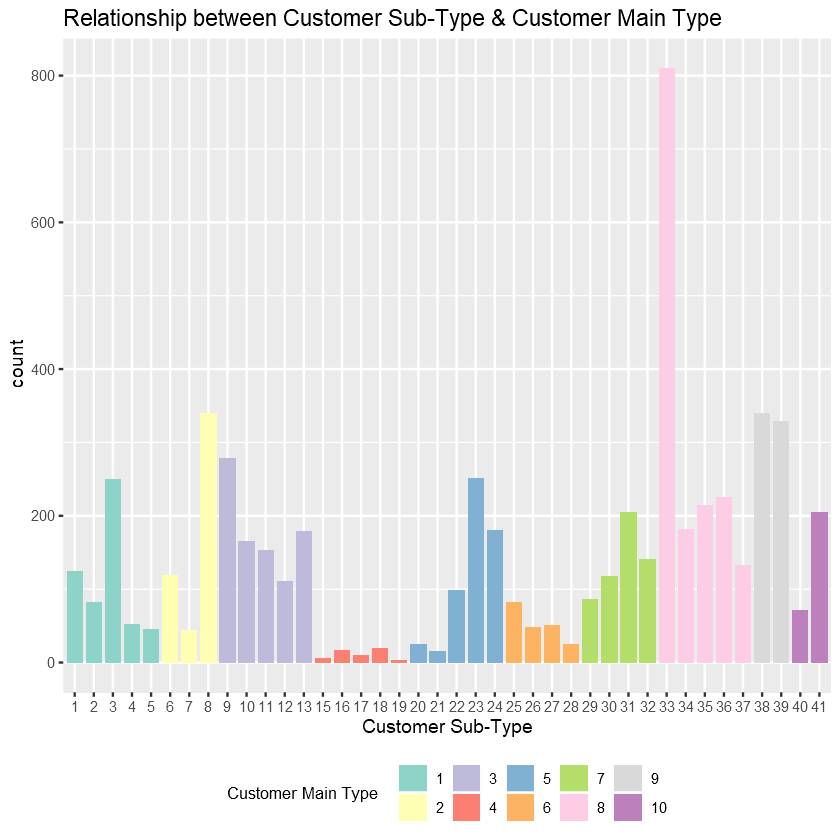

In [13]:
# Plot relationship between Customer Main Type and Customer Sub Type
ggplot(trainData,aes(x = factor(V1),fill=factor(V5))) +
    geom_bar(width=0.8) +
    xlab("Customer Sub-Type") +
    ggtitle('Relationship between Customer Sub-Type & Customer Main Type') +
    theme(legend.position='bottom',legend.title=element_text(size=10)) +
    scale_fill_brewer(palette="Set3",name="Customer Main Type")

Looking at the plot, we can conclude that:
- <b>Customer Main Type 1</b> is represented by <b>Customer Sub-Type 1 - 5</b>
- <b>Customer Main Type 2</b> is represented by <b>Customer Sub-Type 6 - 8</b>
- <b>Customer Main Type 3</b> is represented by <b>Customer Sub-Type 9 - 13</b>
- <b>Customer Main Type 4</b> is represented by <b>Customer Sub-Type 15 - 19</b>
- <b>Customer Main Type 5</b> is represented by <b>Customer Sub-Type 20 - 24</b>
- <b>Customer Main Type 6</b> is represented by <b>Customer Sub-Type 25 - 28</b>
- <b>Customer Main Type 7</b> is represented by <b>Customer Sub-Type 29 - 32</b>
- <b>Customer Main Type 8</b> is represented by <b>Customer Sub-Type 33 - 37</b>
- <b>Customer Main Type 9</b> is represented by <b>Customer Sub-Type 38 - 39</b>
- <b>Customer Main Type 10</b> is represented by <b>Customer Sub-Type 40 - 41</b>
<br>
- There is no <b>Customer Sub Type 14</b> (Junior cosmopolitan) in this training dataset.
- The most common belongs to <b>Customer Main Type 8</b> (Family with Grown Ups) with <b>Customer Subtype 33</b> (Lower class large families).

### 2.3 Distribution of attributes against V86
What we will like to know is whether there are any variables that exhibit certain patterns/trends towards target variable V86, as the observations can be particularly useful when we are trying to predict and identify potential mobile home customers. Hence, we explore the distribution of attributes against V86.<br><br>

We first explore <b>V5 - Customer Main Type</b>.

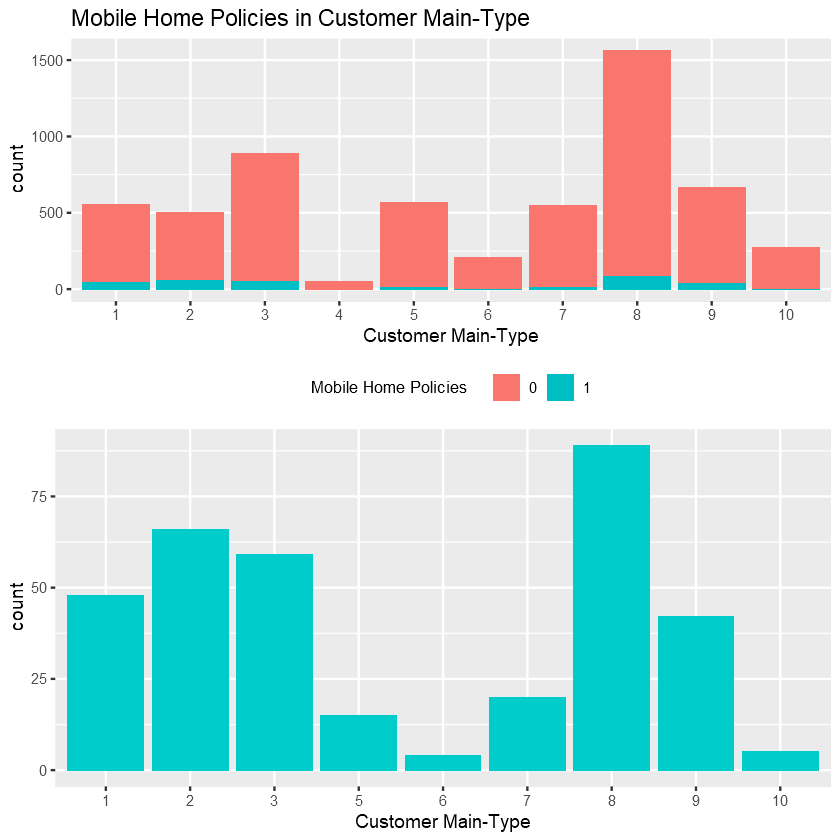

In [14]:
# plot number of mobile home policies in each customer main type
p1 <- ggplot(data = trainData,aes(x=factor(V5),fill=factor(V86))) + 
        geom_bar() +
        xlab("Customer Main-Type") +
        ggtitle('Mobile Home Policies in Customer Main-Type') +
        theme(legend.position='bottom',legend.title=element_text(size=10)) +
        scale_fill_discrete(name="Mobile Home Policies")

# filter plot to just with mobile home policies
p2 <- ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V5),fill=factor(V86))) + 
        geom_bar(fill='#00CCCC') +
        xlab("Customer Main-Type")

grid.arrange(p1, p2, nrow=2)

We see that the number of mobile home policies is most common in <b>customer main type 8</b> (Family with grown ups) followed by <b>customer main type 2</b> (Driven Growers). Note that <b>customer main type 4</b> (Career Loners) has 0 mobile home policies for all of them.

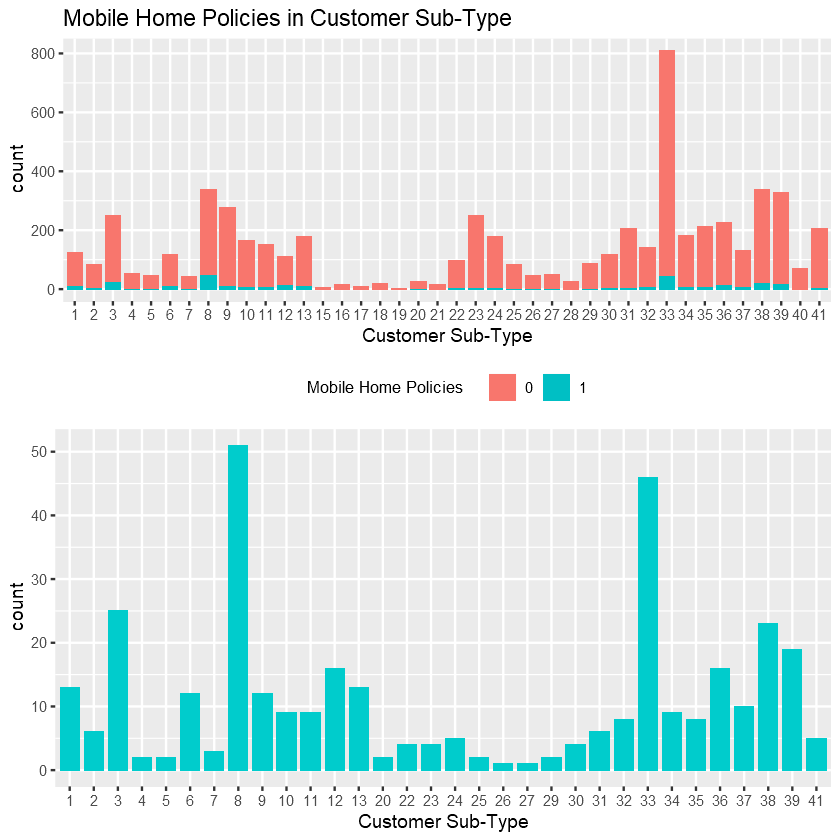

In [15]:
# plot number of mobile home policies in each customer sub type
p1 <- ggplot(data = trainData,aes(x=factor(V1),fill=factor(V86))) + 
        geom_bar(width=0.8) +
        xlab("Customer Sub-Type") +
        ggtitle('Mobile Home Policies in Customer Sub-Type') +
        theme(legend.position='bottom',legend.title=element_text(size=10)) +
        scale_fill_discrete(name="Mobile Home Policies")

# filter plot to just with mobile home policies
p2 <- ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V1),fill=factor(V86))) + 
        geom_bar(width=0.8,fill='#00CCCC') +
        xlab("Customer Sub-Type")

grid.arrange(p1, p2, nrow=2)

We see that the number of mobile home policies is most common in <b>customer sub type 8</b> (Middle class families) and <b>type 33</b> (Lower class large families).
<br><br>
Also note that the folloing customer sub type has 0 mobile home policies:
- <b>Customer Sub Type 14 (Junior cosmopolitan)</b>
- <b>Customer Sub Type 15 (Senior cosmopolitans)</b>
- <b>Customer Sub Type 16 (Students in apartments)</b>
- <b>Customer Sub Type 17 (Fresh masters in the city)</b>
- <b>Customer Sub Type 18 (Single youth)</b>
- <b>Customer Sub Type 19 (Suburban youth)</b>
- <b>Customer Sub Type 21 (Young urban have-nots)</b>
- <b>Customer Sub Type 28 (Residential elderly)</b>
- <b>Customer Sub Type 40 (Large family farms)</b>

We then explore if there are any noticeable trend or pattern in attribute <b>V2 (Number of houses)</b>, <b>V3(Avg size household)</b> and <b>V4(Avg age)</b> with the target variable V86. 

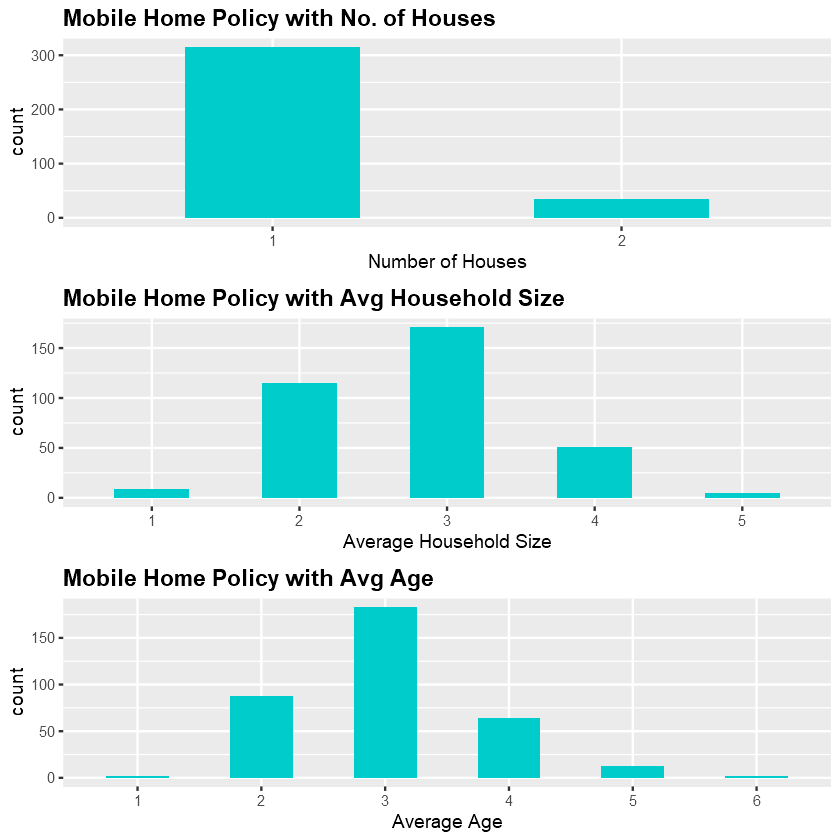

In [16]:
p1<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V2),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Number of Houses") +
        ggtitle('Mobile Home Policy with No. of Houses') +
        theme(plot.title = element_text(face='bold'))
p2<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V3),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Average Household Size") +
        ggtitle('Mobile Home Policy with Avg Household Size') +
        theme(plot.title = element_text(face='bold'))
p3<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V4),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Average Age") +
        ggtitle('Mobile Home Policy with Avg Age') +
        theme(plot.title = element_text(face='bold'))
grid.arrange(p1, p2, p3, nrow=3)

Looking at the plots, we can observe the following:<br>
For <b>V2 - Number of houses</b>,
- Mobile home policy buyers owns 1 or 2 houses
- There are 0 buyers from those who owns 3 to 10 houses

For <b>V3 - Avg size household</b>,
- The most common is of size 3 that purchased mobile home policy
- There are 0 buyers from those whose average household size is 6

For <b>V4 - Avg age</b>,
- The highest group of mobile home policy buyers belong to group 3 (40-50 years old)
- The least common groups are group 1 (20-30 years old) and group 6 (70-80 years old)

Next, we would like to know if religion plays a part in affecting the purchase of mobile home policies. We can plot histogram of each of <b>V6 - V9</b> which represents different religion groups, against our target variable <b>V86</b>.

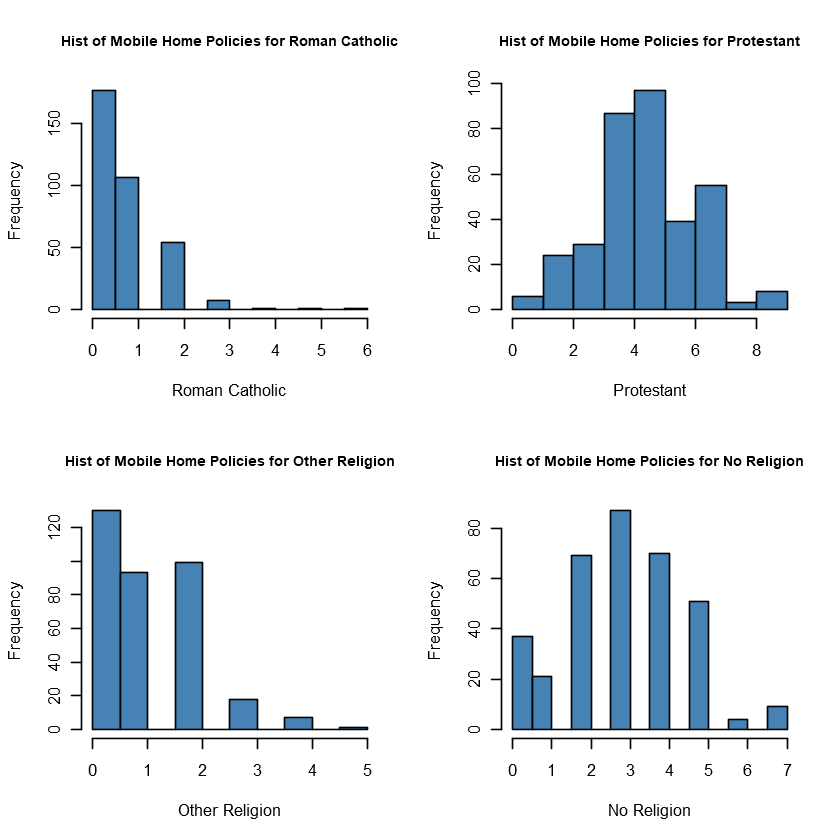

In [17]:
# create histograms of mobile home policies across religions (V6 - V9)
par(mfrow = c(2,2))
hist(trainData[(trainData$V86==1),6],xlab='Roman Catholic',main='Hist of Mobile Home Policies for Roman Catholic',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),7],xlab='Protestant',main='Hist of Mobile Home Policies for Protestant',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),8],xlab='Other Religion',main='Hist of Mobile Home Policies for Other Religion',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),9],xlab='No Religion',main='Hist of Mobile Home Policies for No Religion',cex.main=0.8,col='steelblue')

From the 4 histograms plot for the attributes relating to religion <b>(V6 - V9)</b>, it seems to suggest <b>V6 - Roman Catholic</b> are least likely to buy mobile home policies, while frequency of <b>V7 - Protestant</b> and <b>V9 - No Religion</b> of buying is higher.

Next, we explore the <b>marital status (V10 - V13)</b> as well as presence of children <b>(V14 - V15)</b>. Since from <b>V1</b>, we have identified the main buyers of mobile home policies belong to Middle class families as well as lower class families, we will expect a higher percentage of <b>V10 - Married</b> to own mobile home policies.

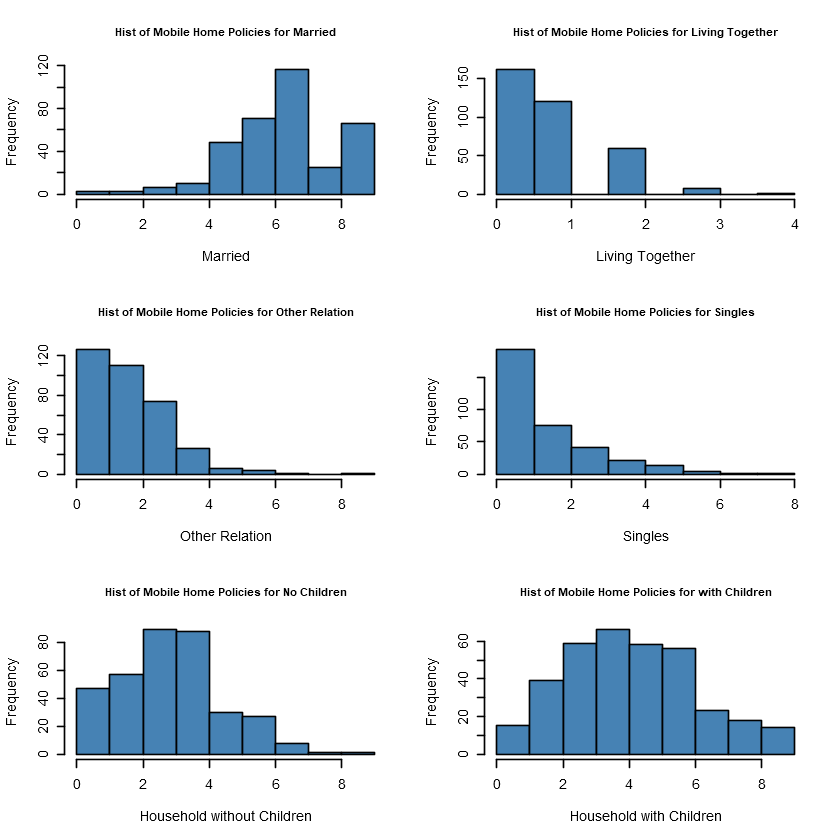

In [18]:
# create histograms of mobile home policies across marital status (V10 - V13) and children (V14 - V15)
par(mfrow = c(3,2))
hist(trainData[(trainData$V86==1),10],xlab='Married',main='Hist of Mobile Home Policies for Married',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),11],xlab='Living Together',main='Hist of Mobile Home Policies for Living Together',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),12],xlab='Other Relation',main='Hist of Mobile Home Policies for Other Relation',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),13],xlab='Singles',main='Hist of Mobile Home Policies for Singles',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),14],xlab='Household without Children',main='Hist of Mobile Home Policies for No Children',cex.main=0.8,col='steelblue')
hist(trainData[(trainData$V86==1),15],xlab='Household with Children',main='Hist of Mobile Home Policies for with Children',cex.main=0.8,col='steelblue')

As expected, those who owns mobile home policies are most common in marital status of <b>V10 - Married</b>. There seems to be a fair distribution between household without children and household with children.

In the correlation coefficient matrix, we discovered that singles are more likely to have no car. Since we know that the majority of the mobile home policies buyers are not single, we will also expect those without any car to not have purchased the mobile home policies logically. <br>We plot the <b>number of cars (V32 - V34)</b> to explore this.

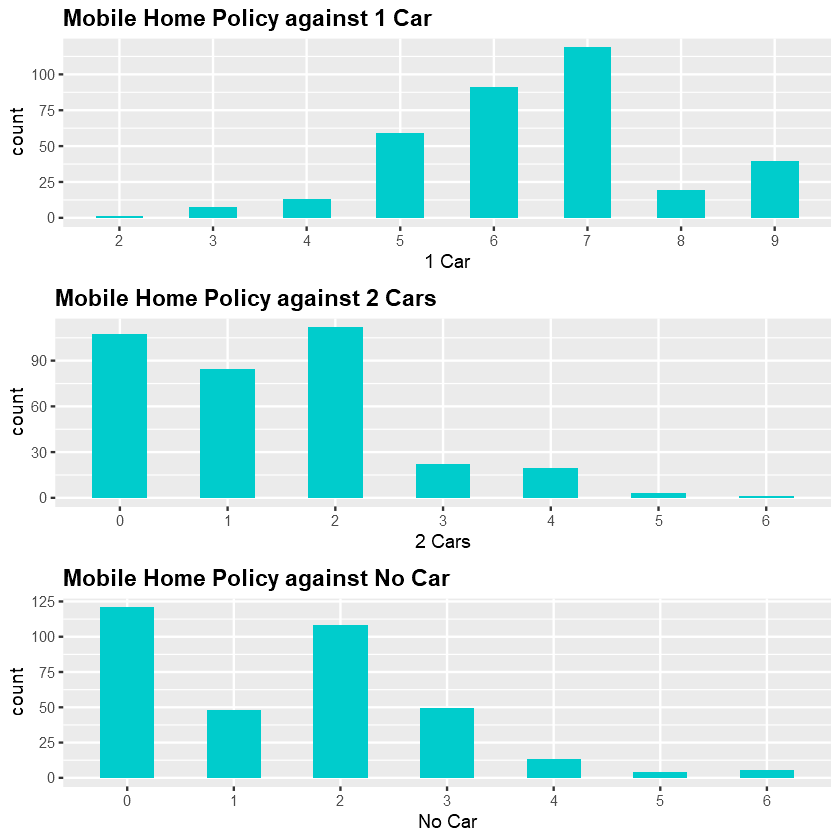

In [19]:
p1<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V32),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("1 Car") +
        ggtitle('Mobile Home Policy against 1 Car') +
        theme(plot.title = element_text(face='bold'))
p2<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V33),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("2 Cars") +
        ggtitle('Mobile Home Policy against 2 Cars') +
        theme(plot.title = element_text(face='bold'))
p3<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V34),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("No Car") +
        ggtitle('Mobile Home Policy against No Car') +
        theme(plot.title = element_text(face='bold'))
grid.arrange(p1, p2, p3, nrow=3)

From the plots, we see majority of mobile home policies owners to have 1 car. What's interesting is there are some who have no car and purchased mobile home policies. Hence, we can conclude the term cars in this dataset does not include mobile home caravan.

<b>V16 - V18</b> carries information about the education level and from the correlation coefficient/matrix we have observed earlier on, education level seems to be highly correlated to social class status <b>(V25 - V29)</b>. Let's see if we can observe any noticeable pattern in any particular group with respect to buying mobile home policy.

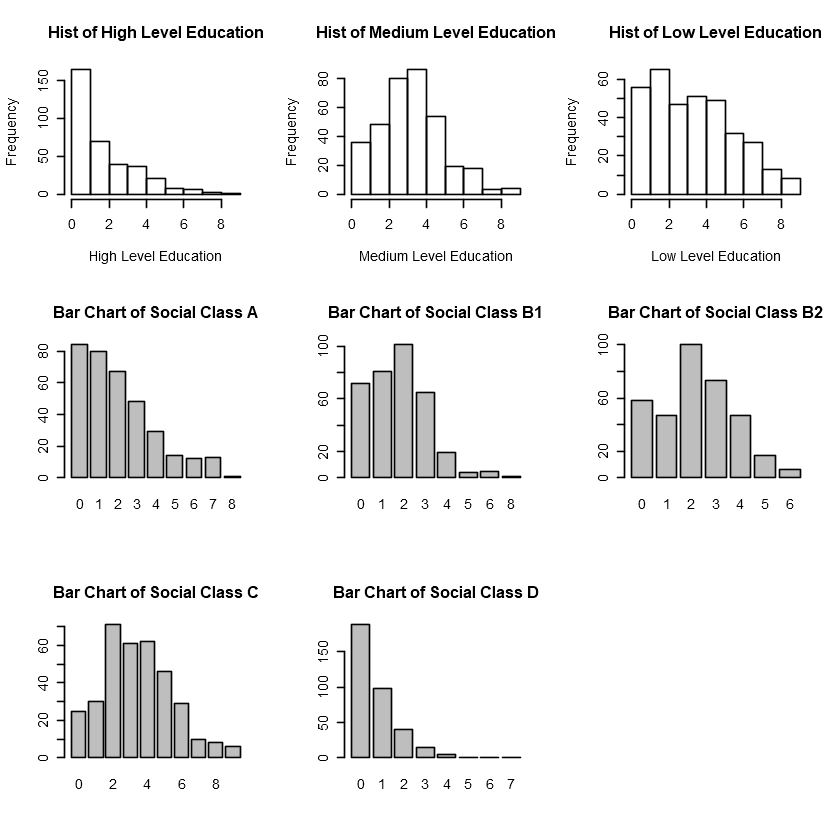

In [20]:
# Plot a histogram or bar chart for V16 - V18 and V25 - V29
par(mfrow = c(3,3))
hist(trainData[(trainData$V86==1),16],xlab='High Level Education',main='Hist of High Level Education')
hist(trainData[(trainData$V86==1),17],xlab='Medium Level Education',main='Hist of Medium Level Education')
hist(trainData[(trainData$V86==1),18],xlab='Low Level Education',main='Hist of Low Level Education')
plot(as.factor(trainData[(trainData$V86==1),25]),main="Bar Chart of Social Class A") 
plot(as.factor(trainData[(trainData$V86==1),26]),main="Bar Chart of Social Class B1")
plot(as.factor(trainData[(trainData$V86==1),27]), main="Bar Chart of Social Class B2")
plot(as.factor(trainData[(trainData$V86==1),28]), main="Bar Chart of Social Class C")
plot(as.factor(trainData[(trainData$V86==1),29]), main="Bar Chart of Social Class D")

Mobile Home policies seem to be less common in high level education and more common with medium and low education. This also corresponds to mobile home policies being less common in social class A and more common in social class B1, B2 and C. It is also notable that it is not common for social class D.

From the observations from education level and social class, it should be expected that mobile home policies will be more popular with those drawing average income. Let's plot the income attributes <b>V37 - V42</b> as well as the purchasing power <b>V43</b>.

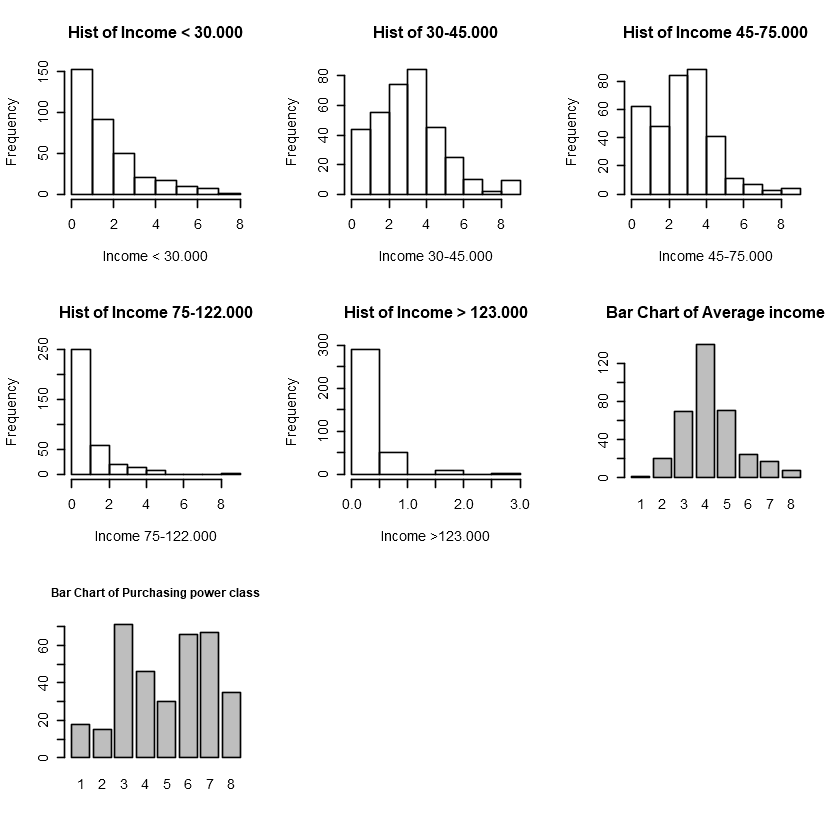

In [21]:
# Plot a histogram or bar chart for V37 - V43
par(mfrow = c(3,3))
hist(trainData[(trainData$V86==1),37],xlab='Income < 30.000',main='Hist of Income < 30.000')
hist(trainData[(trainData$V86==1),38],xlab='Income 30-45.000',main='Hist of 30-45.000')
hist(trainData[(trainData$V86==1),39],xlab='Income 45-75.000',main='Hist of Income 45-75.000')
hist(trainData[(trainData$V86==1),40],xlab='Income 75-122.000',main='Hist of Income 75-122.000')
hist(trainData[(trainData$V86==1),41],xlab='Income >123.000',main='Hist of Income > 123.000')
plot(as.factor(trainData[(trainData$V86==1),42]), main="Bar Chart of Average income")
plot(as.factor(trainData[(trainData$V86==1),43]), main="Bar Chart of Purchasing power class",cex.main=0.9)

As seen in the plots, mobile home policies are more popular with customers drawing average income of \\$30000 -\\$75000, and those with medium to high purchasing power.

Now, let's explore <b>V19 - V24</b> which are attributes pertaining to the occupation of the customers. From earlier plots, we know mobile home policies are more common in customers from social class B1, B2 and C, and those drawing average income of \\$30000-\\$75000. Furthermore in the correlation coefficient matrix, we know different occupations are correlated to different social class.

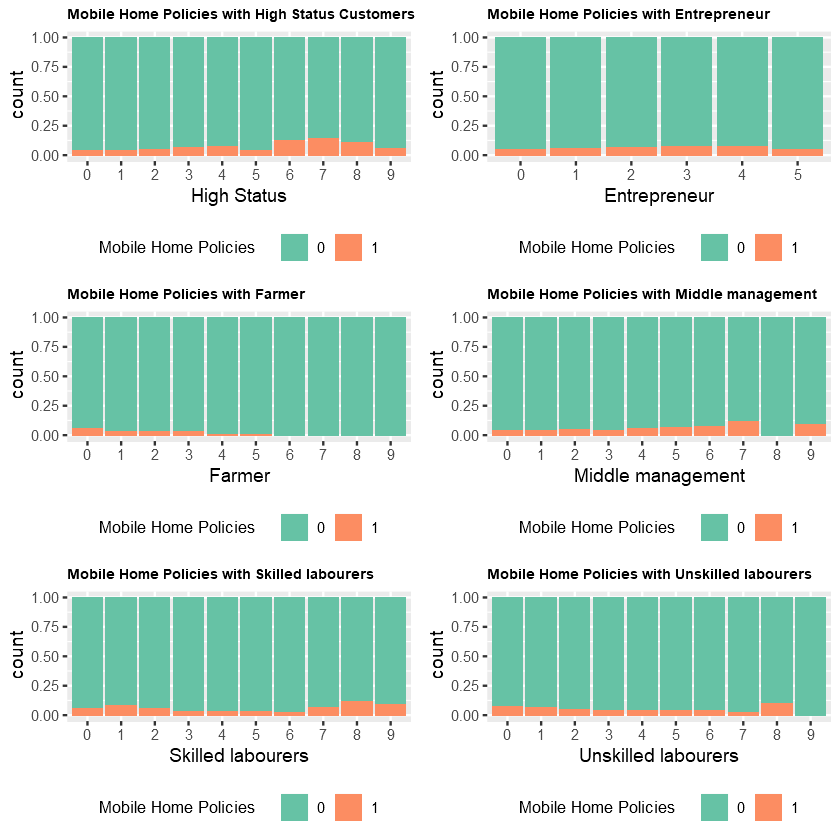

In [22]:
# bar plots of V19 - V24 with V86
p1 <- ggplot(data=trainData,aes(x=factor(V19), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with High Status Customers') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("High Status") +
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))
p2 <- ggplot(data=trainData,aes(x=factor(V20), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with Entrepreneur') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("Entrepreneur")+
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))
p3 <- ggplot(data=trainData,aes(x=factor(V21), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with Farmer') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("Farmer")+
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))
p4 <- ggplot(data=trainData,aes(x=factor(V22), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with Middle management') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("Middle management")+
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))
p5 <- ggplot(data=trainData,aes(x=factor(V23), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with Skilled labourers') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("Skilled labourers")+
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))
p6 <- ggplot(data=trainData,aes(x=factor(V24), fill = as.factor(V86))) +
    geom_bar(position="fill") +
    ggtitle('Mobile Home Policies with Unskilled labourers') +
    scale_fill_brewer(palette="Set2",name="Mobile Home Policies") +
    xlab("Unskilled labourers")+
    theme(plot.title = element_text(size=8,face='bold'),legend.position='bottom',legend.title=element_text(size=10))

grid.arrange(p1, p2, p3, p4, p5, p6, ncol=2, nrow=3)

Looking at the plots, it seems to suggest that the occupations of mobile home policies buyers are diverse, in which there is not really a particular occupation who is most likely to purchase the policy. The only observation that can be observed is if there is a high percentage of farmers in the household, that particular household is least likely to purchase mobile home policies.

Let's see if <b>V30 - rented house</b> and <b>V31 - home owners</b> has any observable pattern towards purchasing of mobile home policies.

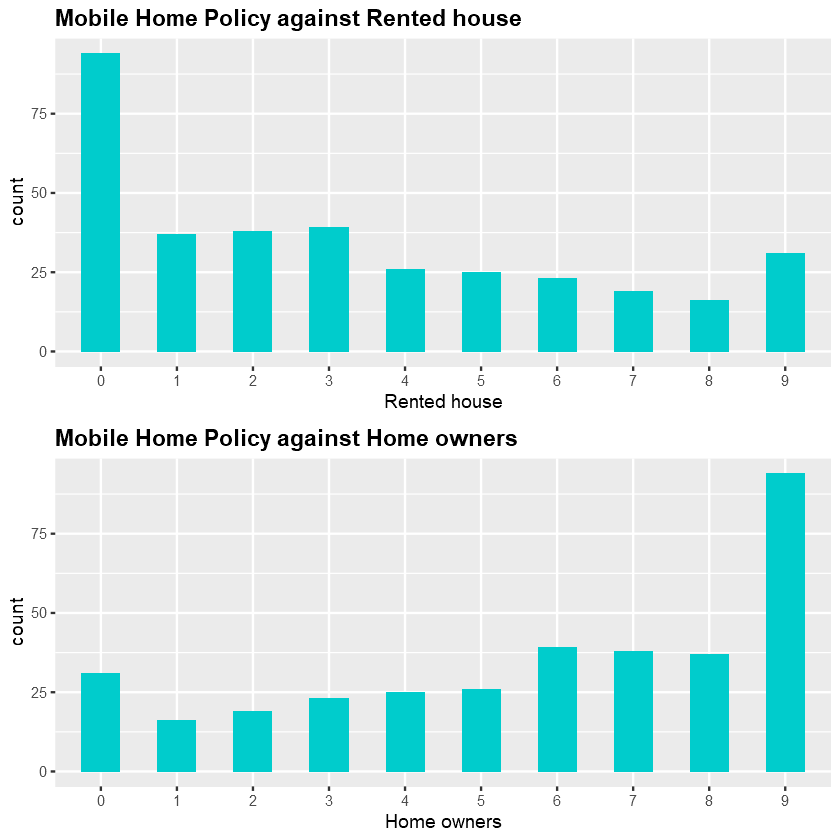

In [23]:
# bar plots of V30 and V31 against V86
p1<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V30),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Rented house") +
        ggtitle('Mobile Home Policy against Rented house') +
        theme(plot.title = element_text(face='bold'))
p2<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V31),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Home owners") +
        ggtitle('Mobile Home Policy against Home owners') +
        theme(plot.title = element_text(face='bold'))

grid.arrange(p1, p2, nrow=2)

Since there is a high correlation between this 2 attributes (i.e. if the customer is not owning the house, they will definitely be renting the house). What's observable is home owners are more likely to purchase mobile home policies compared to customers who are renting their houses.

In our correlation matrix above, we noted that customers with high level education, high status and belonging to social class A are more likely to purchase private health insurance. Whereas for customers with lower level education and belonging to social class C, they are more likely to purchase National Health Service. Furthermore, we have also observed that customers of low education level and lower social class are more likely to purchase the mobile home policies. Let's explore this by plotting <b>V35 - National Health Service</b> and <b>V36 -  Private health insurance</b> against our target variable <b>V86</b>.

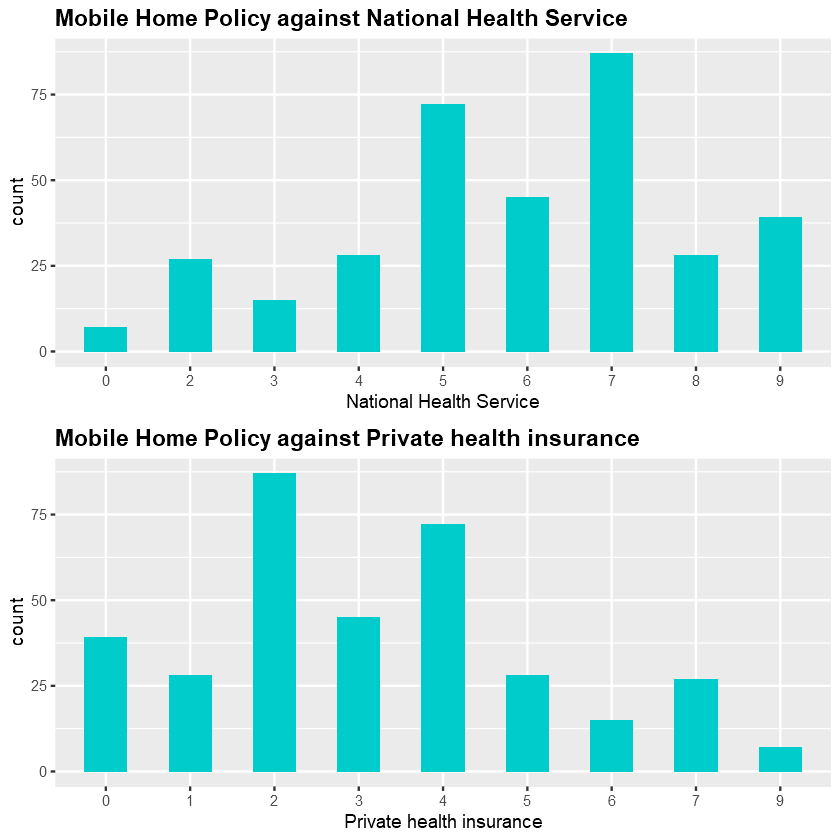

In [62]:
# bar plots of V35 and V36 against V86
p1<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V35),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("National Health Service") +
        ggtitle('Mobile Home Policy against National Health Service') +
        theme(plot.title = element_text(face='bold'))
p2<-ggplot(data = trainData[(trainData$V86==1),],aes(x=factor(V36),fill=factor(V86))) + 
        geom_bar(width=0.5,fill='#00CCCC') +
        xlab("Private health insurance") +
        ggtitle('Mobile Home Policy against Private health insurance') +
        theme(plot.title = element_text(face='bold'))

grid.arrange(p1, p2, nrow=2)

Even though lower level education and lower social class are more likely to purchase mobile home policies, and they are also more likely to purchase national health service insurance, the relationship of customers who bought national health service insurance and purchase of mobile home policies is not distinctly disguishable as suggested by the plots. Both group of customers in the plot above are equally likely to purchase mobile home policies.

Attributes <b>V44 to V85</b> are related to insurance products ownership and in the correlation matrix earlier on, we noted that contribution to each policy is highly correlated to number of that policy. What we would like to find out is are there any particular policies which is highly correlated to mobile home policies as well, meaning what other policies will the customer buy when they purchased the mobile home policy or vice versa.

In [39]:
# filter the data to those who purchased mobile home policies
subdata<-trainData[trainData$V86==1,]

We first plot all the contributions towards each insurance type as a bar chart and the their respective numbers as a pie chart for comparison. 

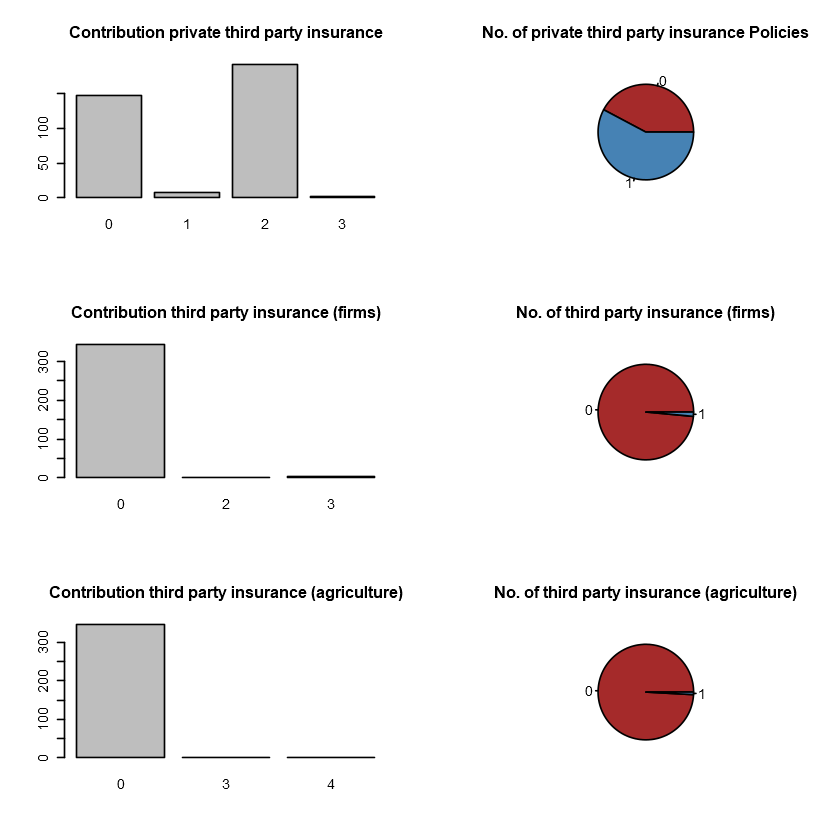

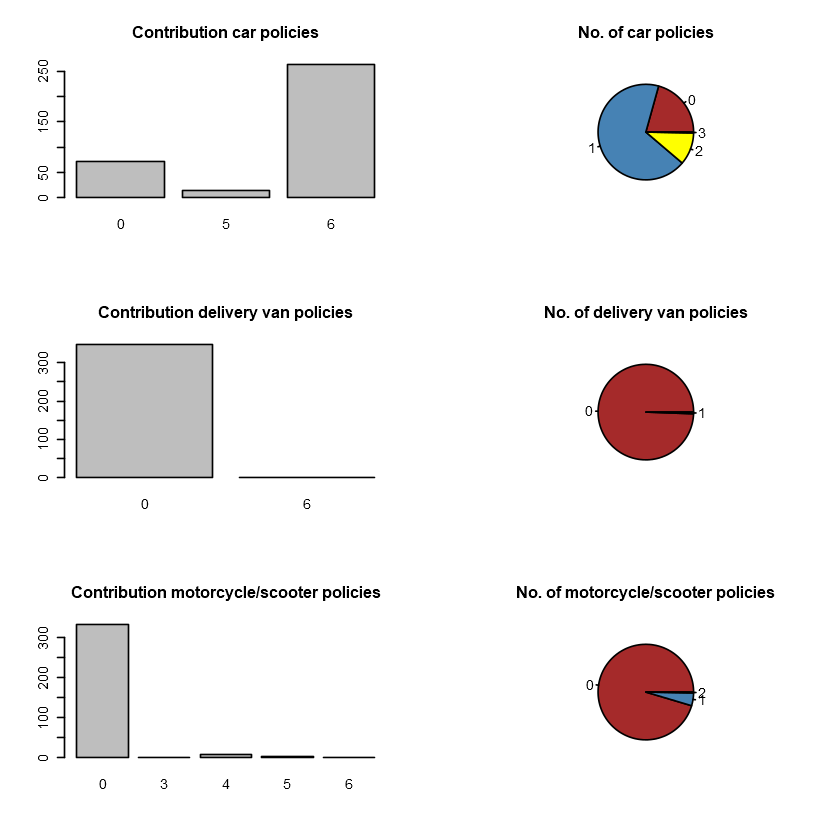

In [90]:
par(mfrow = c(3,2))
plot(as.factor(subdata[,44]), main="Contribution private third party insurance")
pie(table(subdata$V65),col=c("brown","steelblue","yellow"),main = "No. of private third party insurance Policies")
plot(as.factor(subdata[,45]), main="Contribution third party insurance (firms)")
pie(table(subdata$V66),col=c("brown","steelblue","yellow"),main = "No. of third party insurance (firms)")
plot(as.factor(subdata[,46]), main="Contribution third party insurance (agriculture)")
pie(table(subdata$V67),col=c("brown","steelblue","yellow"),main = "No. of third party insurance (agriculture)")
plot(as.factor(subdata[,47]), main="Contribution car policies")
pie(table(subdata$V68),col=c("brown","steelblue","yellow"),main = "No. of car policies")
plot(as.factor(subdata[,48]), main="Contribution delivery van policies")
pie(table(subdata$V69),col=c("brown","steelblue","yellow"),main = "No. of delivery van policies")
plot(as.factor(subdata[,49]), main="Contribution motorcycle/scooter policies")
pie(table(subdata$V70),col=c("brown","steelblue","yellow"),main = "No. of motorcycle/scooter policies")

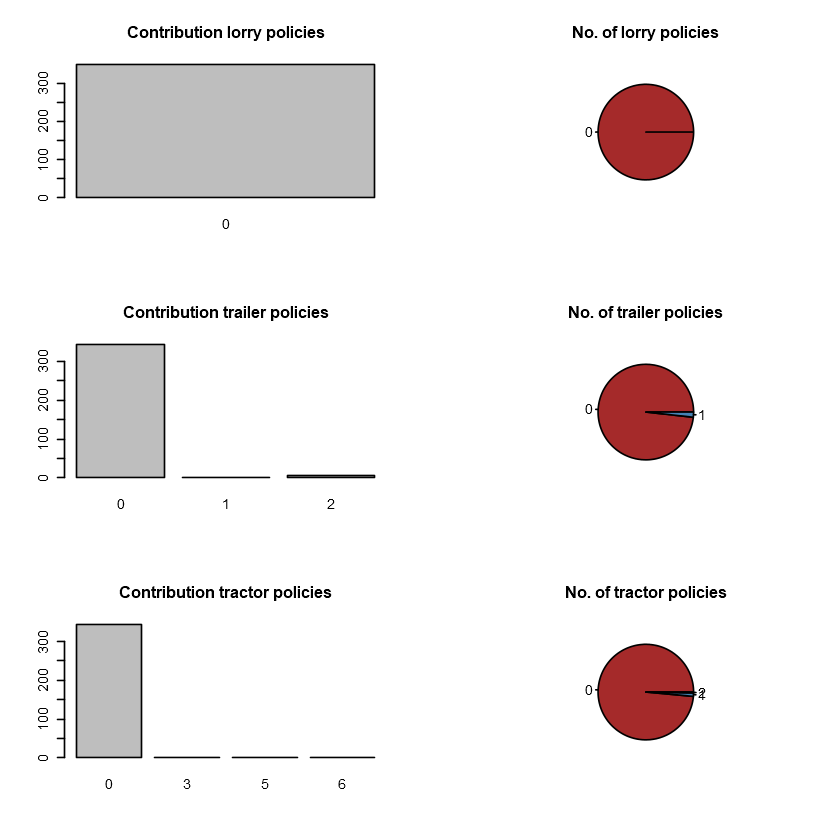

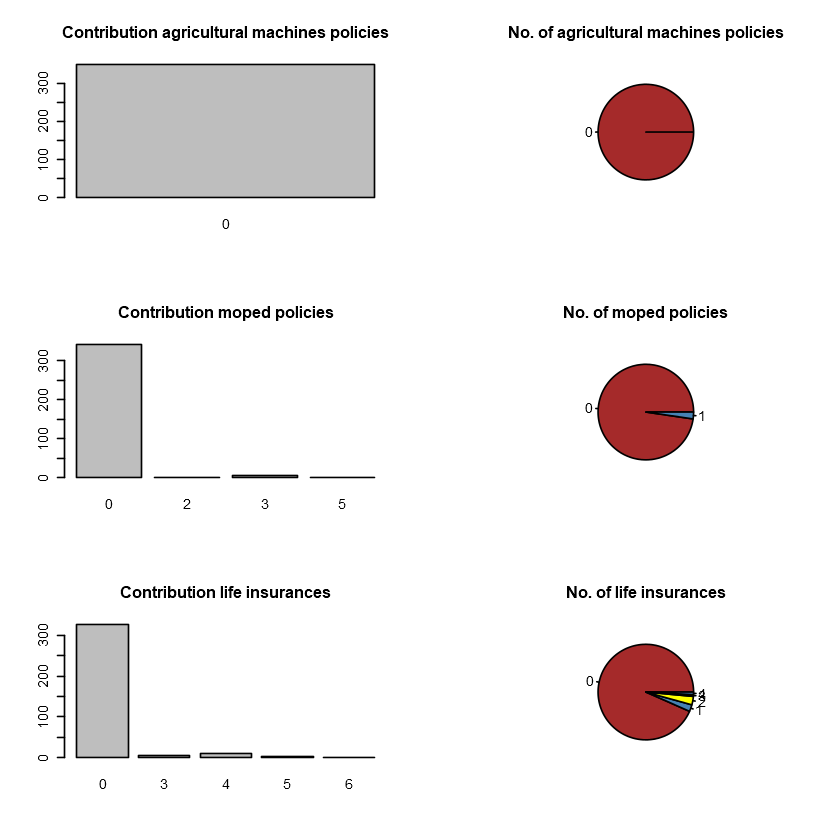

In [91]:
par(mfrow = c(3,2))
plot(as.factor(subdata[,50]), main="Contribution lorry policies")
pie(table(subdata$V71),col=c("brown","steelblue","yellow"),main = "No. of lorry policies")
plot(as.factor(subdata[,51]), main="Contribution trailer policies")
pie(table(subdata$V72),col=c("brown","steelblue","yellow"),main = "No. of trailer policies")
plot(as.factor(subdata[,52]), main="Contribution tractor policies")
pie(table(subdata$V73),col=c("brown","steelblue","yellow"),main = "No. of tractor policies")
plot(as.factor(subdata[,53]), main="Contribution agricultural machines policies")
pie(table(subdata$V74),col=c("brown","steelblue","yellow"),main = "No. of agricultural machines policies")
plot(as.factor(subdata[,54]), main="Contribution moped policies")
pie(table(subdata$V75),col=c("brown","steelblue","yellow"),main = "No. of moped policies")
plot(as.factor(subdata[,55]), main="Contribution life insurances")
pie(table(subdata$V76),col=c("brown","steelblue","yellow"),main = "No. of life insurances")

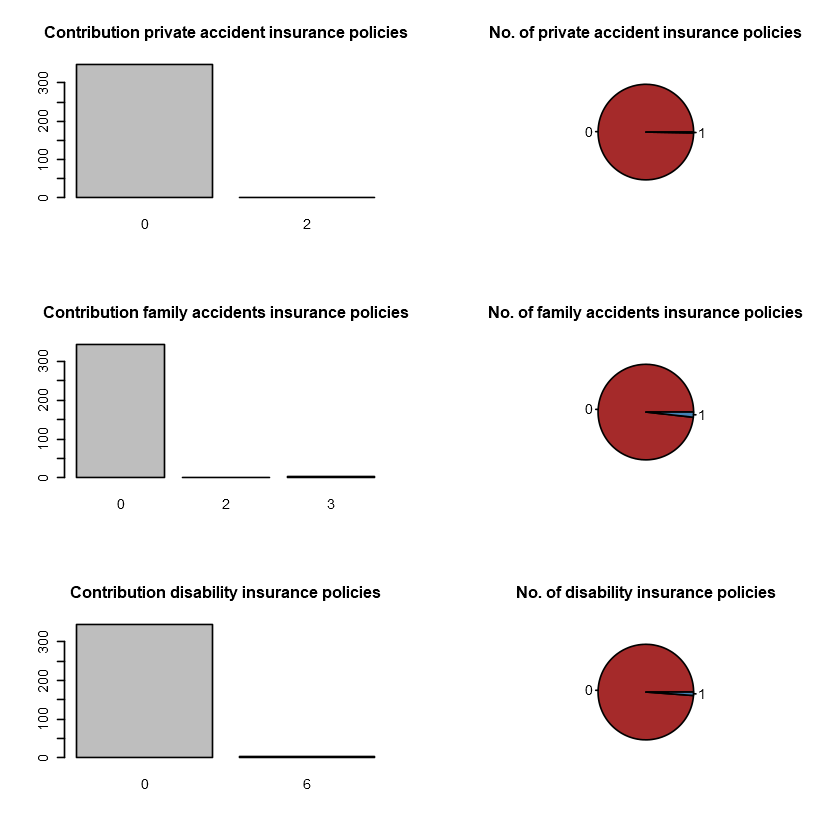

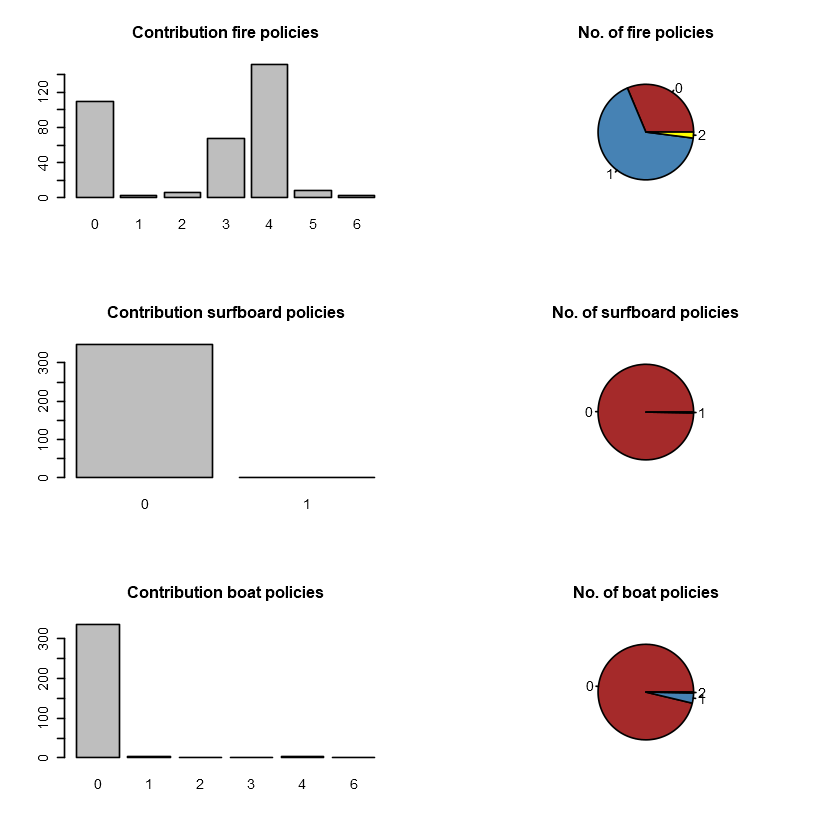

In [93]:
par(mfrow = c(3,2))
plot(as.factor(subdata[,56]), main="Contribution private accident insurance policies")
pie(table(subdata$V77),col=c("brown","steelblue","yellow"),main = "No. of private accident insurance policies")
plot(as.factor(subdata[,57]), main="Contribution family accidents insurance policies")
pie(table(subdata$V78),col=c("brown","steelblue","yellow"),main = "No. of family accidents insurance policies")
plot(as.factor(subdata[,58]), main="Contribution disability insurance policies")
pie(table(subdata$V79),col=c("brown","steelblue","yellow"),main = "No. of disability insurance policies")
plot(as.factor(subdata[,59]), main="Contribution fire policies")
pie(table(subdata$V80),col=c("brown","steelblue","yellow"),main = "No. of fire policies")
plot(as.factor(subdata[,60]), main="Contribution surfboard policies")
pie(table(subdata$V81),col=c("brown","steelblue","yellow"),main = "No. of surfboard policies")
plot(as.factor(subdata[,61]), main="Contribution boat policies")
pie(table(subdata$V82),col=c("brown","steelblue","yellow"),main = "No. of boat policies")

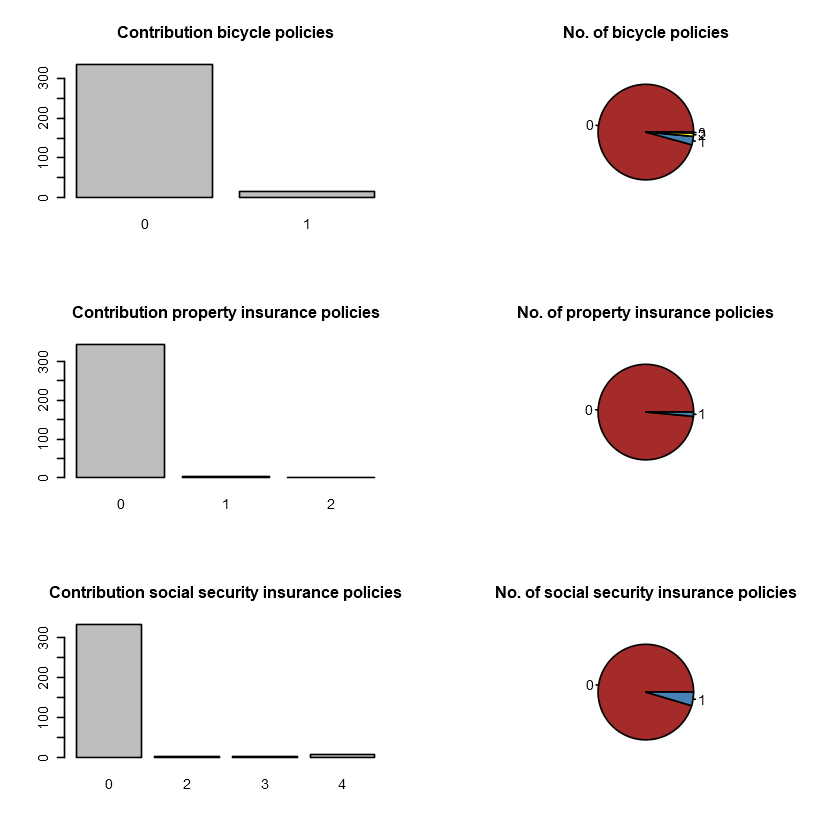

In [95]:
par(mfrow = c(3,2))

plot(as.factor(subdata[,62]), main="Contribution bicycle policies")
pie(table(subdata$V83),col=c("brown","steelblue","yellow"),main = "No. of bicycle policies")
plot(as.factor(subdata[,63]), main="Contribution property insurance policies")
pie(table(subdata$V84),col=c("brown","steelblue","yellow"),main = "No. of property insurance policies")
plot(as.factor(subdata[,64]), main="Contribution social security insurance policies")
pie(table(subdata$V85),col=c("brown","steelblue","yellow"),main = "No. of social security insurance policies")

#### Summary of Product-Ownership Attributes V44 - V85

|Insurance Type|Contribution|Number of policies|
|--------------|------------|------------------|
|Private Third Party      |Majority is \\$0 or \\$100-\\$199|Slightly more '1' than '0'|
|Third Party (Firms)      |Majority is \\$0                 |Majority is '0'|
|Third Party (Agriculture)|Majority is \\$0                 |Majority is '0'|
|Car                      |Majority is \\$1000-\\$4999      |Majority is '1', followed by '0' and '2'|
|Delivery Van             |Majority is \\$0                 |Majority is '0'|
|Motorcycle Scooter       |Majority is \\$0                 |Majority is '0'|
|Lorry                    |Everyone is \\$0                 |Everyone is '0'|
|Trailer                  |Majority is \\$0                 |Majority is '0'|
|Tractor                  |Majority is \\$0                 |Majority is '0'|
|Agricultural Machine     |Everyone is \\$0                 |Everyone is '0'|
|Moped                    |Majority is \\$0                 |Majority is '0'|
|Life                     |Majority is \\$0                 |Majority is '0'|
|Private Accident         |Majority is \\$0                 |Majority is '0'|
|Family Accident          |Majority is \\$0                 |Majority is '0'|
|Disability               |Majority is \\$0                 |Majority is '0'|
|Fire                     |Majority is \\$200 - \\$499      |Majority is '1', followed by '0' and '2'|
|Surfboard                |Majority is \\$0                 |Majority is '0'|
|Boat                     |Majority is \\$0                 |Majority is '0'|
|Bicycle                  |Majority is \\$0                 |Majority is '0'|
|Property Insurance       |Majority is \\$0                 |Majority is '0'|
|Social Security          |Majority is \\$0                 |Majority is '0'|

From these observations, we can conclude that mobile home policies will not buy lorry and agricultural machine policies. On the other hand, they are also likely to purchase car policy and contribute \\$1000 to \\$4999 and fire policy and contribute \\$200 - \\$499, and maybe private third party insurance with contribution at \\$100 - \\$199.

In [25]:
# return number of non zeroes rows for V65 - V85 when data is filtered to V86==1
for (i in 65:85){
    result <- sum(trainData[trainData$V86==1,i]!=0)
    cat("Number of non-zeroes rows in V" , i , "is" , result , " ,(" , round((result/348)*100,1) , "%)" ,"\n")
}

Number of non-zeroes rows in V 65 is 201  ,( 57.8 %) 
Number of non-zeroes rows in V 66 is 5  ,( 1.4 %) 
Number of non-zeroes rows in V 67 is 3  ,( 0.9 %) 
Number of non-zeroes rows in V 68 is 276  ,( 79.3 %) 
Number of non-zeroes rows in V 69 is 2  ,( 0.6 %) 
Number of non-zeroes rows in V 70 is 16  ,( 4.6 %) 
Number of non-zeroes rows in V 71 is 0  ,( 0 %) 
Number of non-zeroes rows in V 72 is 6  ,( 1.7 %) 
Number of non-zeroes rows in V 73 is 5  ,( 1.4 %) 
Number of non-zeroes rows in V 74 is 0  ,( 0 %) 
Number of non-zeroes rows in V 75 is 8  ,( 2.3 %) 
Number of non-zeroes rows in V 76 is 23  ,( 6.6 %) 
Number of non-zeroes rows in V 77 is 1  ,( 0.3 %) 
Number of non-zeroes rows in V 78 is 6  ,( 1.7 %) 
Number of non-zeroes rows in V 79 is 4  ,( 1.1 %) 
Number of non-zeroes rows in V 80 is 239  ,( 68.7 %) 
Number of non-zeroes rows in V 81 is 1  ,( 0.3 %) 
Number of non-zeroes rows in V 82 is 13  ,( 3.7 %) 
Number of non-zeroes rows in V 83 is 15  ,( 4.3 %) 
Number of non-zeroes r

It is observed that for the 348 customers who bought mobile home policies:
- 276 (79%) of them also bought <b>car policies (V68)</b>
- 239 (69%) of them also bought <b>fire policies (V80)</b>
- 201 (58%) of them also bought <b>private 3rd party insurance (V65)</b>
- 0 of them bought <b>lorry policies (V71), agricultural machine policies (V74)</b>

### Summary of exploration of variables' distribution with V86

Out of 5822 customers in this dataset, only 348 customers (~6%) of them have purchased mobile home policies.
Exploring on these 348 customers, we observed that high percentages of them:
- comes from Middle class families & lower class families
- are family with grown ups or drivern growers
- possesses 1 or 2 houses
- average household size is 3
- belongs to 40-50 years old
- Protestant & No religion dominates
- Married
- received medium and low education level
- social class B1, B2, C
- possess 1 car
- average income is around \\$30000 to \\$75000
- owns car policy and contribute \\$1000 to \\$4999
- owns fire policy and contribute \\$200 - \\$499
- owns private third party insurance and contribute \\$100 - \\$199

Intuition from these observations tell us customers of mobile home policies are <b>middle-sized families with average income</b>, in which they <b>own property and car</b>, resulting in them <b>owning car and fire policy</b> as well. Possible explanation is if a family is drawing average income, they are at higher chance to purchase a caravan as it is relatively cheaper to go on a holiday with a caravan in their home country compared to taking the plane overseas for holiday. Also, caravan are normally towed by car which explains why there are high number of mobile home policies customers owning car and car policy as well. These customers owns property and will have the tendency to purchase fire policy for their property/car assumingly.

Looking at the other side of the spectrum, these 348 customers did not come from:
- career loners
- Junior cosmopolitan, Senior cosmopolitans, Students in apartments, Fresh masters in the city, Single youth, Suburban youth, Young urban have-nots, Residential elderly, Large family farms
- who owns 3 to 10 houses
- whose average household size 6
- who owns lorry policy
- who owns agricultural machine policy

Looking at these observations, it is highly unlikely for customer who is <b>alone and young</b>, or customer with <b>large families who either are elderly or stay in farms</b> to purchase caravan. Logically speaking, this makes sense as if you are young, your priority would not be to buy a caravan as you will not have the income to do so, and if you are alone, buying a car is more enticing than buying a caravan. Similarly, if you are elderly, you will not have the energy to go on a holiday with a caravan as it's considered more adventureous. Buying agricultural machine/lorry will also be more meaningful if you are staying in the farm.

Before we dive into using techniques subset selection or shrinkage method, based on the exploratory data analysis, we expect the following attributes to be significant in helping us predict if a customer will purchase a mobile home policy:<br><br>
1) V1 - Customer Subtype <br>
2) V2 - Number of houses <br>
3) V3 - Avg size household <br>
4) V4 - Avg age <br>
5) V5 - Customer main type <br>
6) V10 - Married <br>
7) V17 - Medium level education <br>
8) V18 - Lower level education<br>
9) V26 - Social class B1<br>
10) V27 - Social class B2<br>
11) V28 - Social class C<br>
12) V32 - 1 Car<br>
13) V38 - Income 30-45.000<br>
14) V44 - Contribution private third party insurance<br>
15) V47 - Contribution car policies<br>
16) V50 - Contribution lorry policies<br>
17) V53 - Contribution agricultural machines policies<br> 
18) V59 - Contribution fire policies<br>
19) V65 - Number of private third party insurance<br>
20) V68 - Number of car policies<br>
21) V71 - Number of lorry policies<br>
22) V74 - Number of agricultural machines policies<br>
23) V80 - Number of fire policies<br>

## 3. Model Development<a class="anchor" id="sec_3"></a>

Before we try to develop our model, we should change the two nominal attributes <b>V1, V5</b> into factor form. Note that although attributes <b>V4, V6-V64</b> are categorical as well, they are ordinal in which the number representing in each of these attributes are ordred representations of their respective categories. Hence, we will not to convert them and still treat them as numerical discrete in this dataset. The rest of the attributes <b>V2, V3, V65-V85</b> are numerical discrete variables which why we leave them untouched as well.

In [3]:
# change numerical to categorical data type for V1 and V5
trainData[,c(1,5)] <- lapply(trainData[,c(1,5)],factor)
str(trainData[,c(1,5)])

'data.frame':	5822 obs. of  2 variables:
 $ V1: Factor w/ 40 levels "1","2","3","4",..: 32 36 36 9 39 22 38 32 32 11 ...
 $ V5: Factor w/ 10 levels "1","2","3","4",..: 8 8 8 3 10 5 9 8 8 3 ...


After converting <b>V1, V5</b> into factor form, the total number of predictor variables is now 85 - 2 + 40 + 10 = 133.

### 3.1 Feature Selection
Subset selection, stepwise selection and Lasso regularisation are some of the methods available to identify those predictor variables that are significantly better to predict the target variable, and they are especially useful if the number of predictor variables available is large which in particularly, useful in this assignment as we have a total of 133 predictor variables available to us.

Firstly for subset selection, as the number of predictor variables available here is large (i.e. 133), we will have to train $2^{133}$ models which is computationally expensive in terms of time complexity. Hence, we will not consider the method of exhaustive subset selection in this assignment.

The next method we consider is stepwise collection, which includes forward stepwise selection and backward stepwise selection. We can use the `regsubsets` function from `leaps` package to do them.

### 3.1.1 Forward Stepwise Selection

In [8]:
regfit.fwd <- regsubsets(trainData$V86~.,really.big=T,data=trainData,nvmax=133,method='forward')
reg.summary.fwd <- summary(regfit.fwd)
reg.summary.fwd

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"9  linear dependencies found"

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"

Subset selection object
Call: regsubsets.formula(trainData$V86 ~ ., really.big = T, data = trainData, 
    nvmax = 133, method = "forward")
131 Variables  (and intercept)
     Forced in Forced out
V12      FALSE      FALSE
V13      FALSE      FALSE
V14      FALSE      FALSE
V15      FALSE      FALSE
V16      FALSE      FALSE
V17      FALSE      FALSE
V18      FALSE      FALSE
V19      FALSE      FALSE
V110     FALSE      FALSE
V111     FALSE      FALSE
V112     FALSE      FALSE
V113     FALSE      FALSE
V115     FALSE      FALSE
V116     FALSE      FALSE
V117     FALSE      FALSE
V118     FALSE      FALSE
V119     FALSE      FALSE
V120     FALSE      FALSE
V121     FALSE      FALSE
V122     FALSE      FALSE
V123     FALSE      FALSE
V124     FALSE      FALSE
V125     FALSE      FALSE
V126     FALSE      FALSE
V127     FALSE      FALSE
V128     FALSE      FALSE
V129     FALSE      FALSE
V130     FALSE      FALSE
V131     FALSE      FALSE
V132     FALSE      FALSE
V133     FALSE      FAL

We plot $C_p$, BIC, adjusted-$R^2$ and RSS scores in order to identify a satisfactory model.

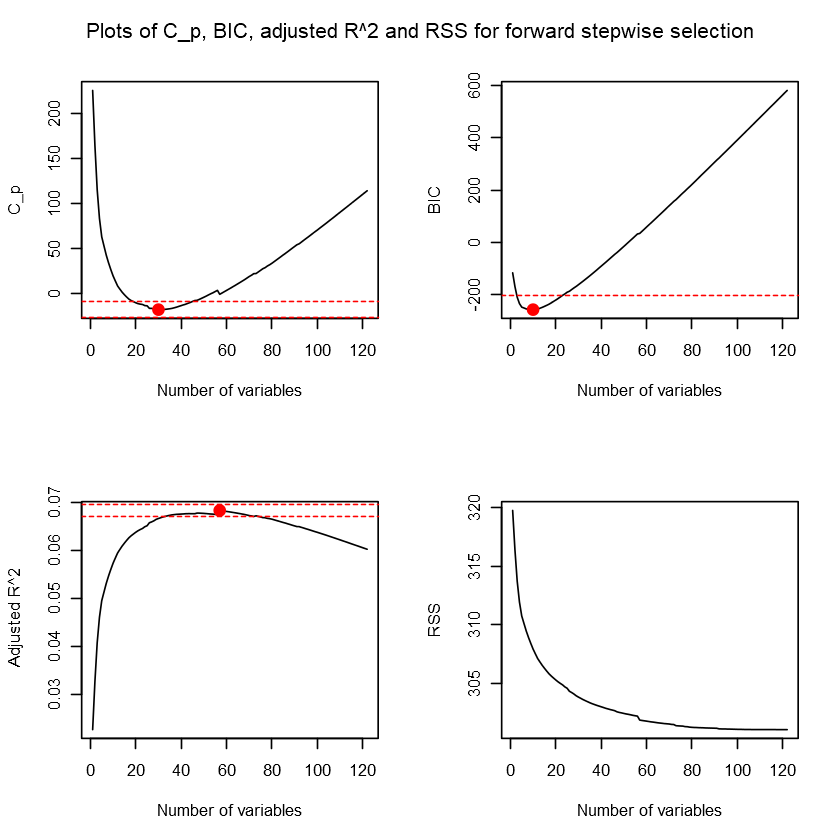

In [22]:
par(mfrow = c(2, 2))
# plot Mallow's CP
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
min.cp <- min(reg.summary.fwd$cp)
std.cp <- sd(reg.summary.fwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
# plot BIC
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
min.bic <- min(reg.summary.fwd$bic)
std.bic <- sd(reg.summary.fwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
# plot Adjr2
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
max.adjr2 <- max(reg.summary.fwd$adjr2)
std.adjr2 <- sd(reg.summary.fwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
# plot RSS
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

There are several measures which we can take to help us select the best predictor variables among all available predictor variables, and we consider the following 3 measures:

1) Mallow's CP $^{[1]}$ <br>
2) Bayesian Information Criterion $^{[2]}$ <br>
3) Adjusted $R^2$ $^{[1]}$ <br>

These measures will add penalty to the residual sum of squares for the number of variables (i.e. complexity) in the model. Since the more number of predictor variables we fit into our model, the complexity increases and the residual sum of squares of the model will be expected to decrease $^{[3]}$. Our goal is to find a model that has a low residual sum of squares but we will not want to fit a model with all the variables available because it would result in overfitting since as shown in our plot, RSS is lowest with 85 predictor variables in our model. Hence based on the above 3 measures, we will want to find a small value for Mallow's CP and Bayesian Information Criterion, and a large value for adjusted $R^2$.

Based on the plots, according to Mallow's CP, the best performer is the model with 30 predictor variables. According to BIC, the best performer is the model with 10 predictor variables. According to Adjusted $R^2$, the best model is the model with 57 predictor variables. If we were to look at the number of variables that are within 0.2 standard deviations from the optimal, we can see that <b>25</b> number of predictor variables seem to satisfy the 3 criterias.

We can also conclude here that a model with <b>9</b> or less predictor variables is considered underfitting and model with <b>58</b> predictor variables or more is considered overfitting.

We get the top 25 recommended variables by forward stepwise selection.

In [32]:
# best 25 variables for Forward Stepwise Selection
coef(regfit.fwd, 25)

(Intercept)           V18          V110          V112          V138 
 0.0074178663  0.0702808724 -0.0197175025  0.0756166664  0.0194523801 
           V4           V14           V16           V19           V25 
 0.0047499053  0.0005221924  0.0082345204  0.0015726522 -0.0014701665 
          V27           V37           V50           V51           V52 
 0.0008584565 -0.0043756101 -0.0126103498  0.0155124271  0.0007004117 
          V53           V56           V66           V67           V68 
-0.0121192335 -0.0057713664  0.0050821274 -0.0464846184  0.0550898596 
          V76           V54           V55           V57           V58 
 0.0127630884 -0.0579040996 -0.0204229857 -0.0102757800  0.0028522297 
         V510 
-0.0271047160

### 3.1.2 Backward Stepwise Selection

We do the same in Backward Stepwise Selection as what we did in Forward Stepwise Selection.

In [33]:
regfit.bwd <- regsubsets(trainData$V86~.,really.big=T,data=trainData,nvmax=133,method='backward')
reg.summary.bwd <- summary(regfit.bwd)
reg.summary.bwd

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"9  linear dependencies found"

Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"

Subset selection object
Call: regsubsets.formula(trainData$V86 ~ ., really.big = T, data = trainData, 
    nvmax = 133, method = "backward")
131 Variables  (and intercept)
     Forced in Forced out
V12      FALSE      FALSE
V13      FALSE      FALSE
V14      FALSE      FALSE
V15      FALSE      FALSE
V16      FALSE      FALSE
V17      FALSE      FALSE
V18      FALSE      FALSE
V19      FALSE      FALSE
V110     FALSE      FALSE
V111     FALSE      FALSE
V112     FALSE      FALSE
V113     FALSE      FALSE
V115     FALSE      FALSE
V116     FALSE      FALSE
V117     FALSE      FALSE
V118     FALSE      FALSE
V119     FALSE      FALSE
V120     FALSE      FALSE
V121     FALSE      FALSE
V122     FALSE      FALSE
V123     FALSE      FALSE
V124     FALSE      FALSE
V125     FALSE      FALSE
V126     FALSE      FALSE
V127     FALSE      FALSE
V128     FALSE      FALSE
V129     FALSE      FALSE
V130     FALSE      FALSE
V131     FALSE      FALSE
V132     FALSE      FALSE
V133     FALSE      FA

We plot $C_p$, BIC, adjusted-$R^2$ and RSS scores in order to identify a satisfactory model.

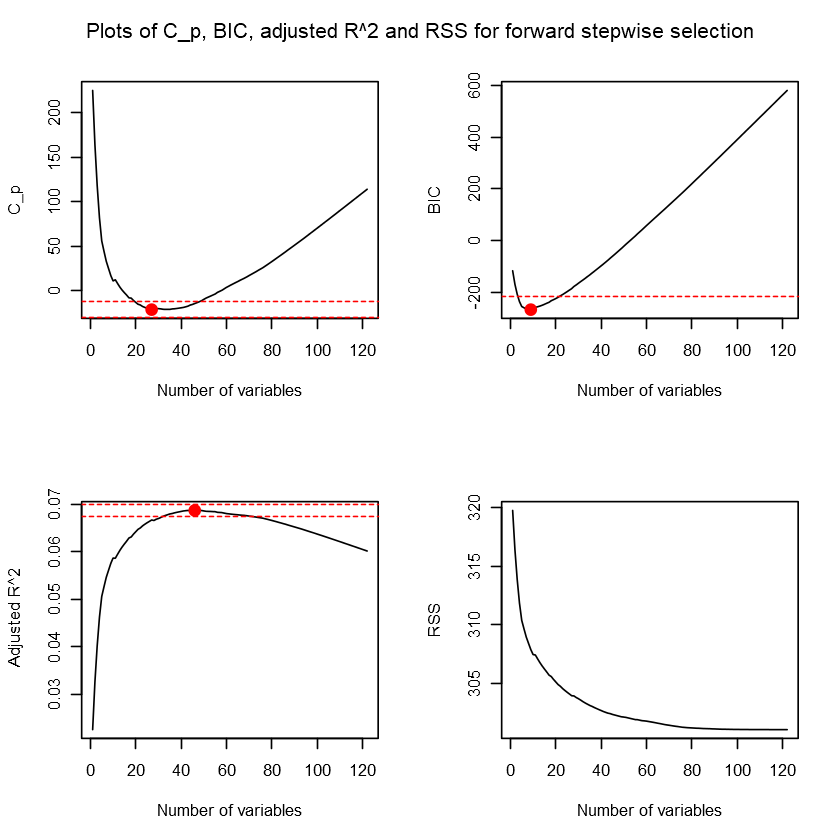

In [34]:
par(mfrow = c(2, 2))
# plot Mallow's CP
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
min.cp <- min(reg.summary.bwd$cp)
std.cp <- sd(reg.summary.bwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
# plot BIC
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
min.bic <- min(reg.summary.bwd$bic)
std.bic <- sd(reg.summary.bwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
# plot Adjr2
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
max.adjr2 <- max(reg.summary.bwd$adjr2)
std.adjr2 <- sd(reg.summary.bwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
# plot RSS
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Similar to Forward Stepwise Selection, we observe the plots for Mallow's CP, BIC and Adjusted $R^2$.

Based on the plots, according to Mallow's CP, the best performer is the model with 27 predictor variables. According to BIC, the best performer is the model with 9 predictor variables. According to Adjusted $R^2$, the best model is the model with 46 predictor variables. 

If we were to look at the number of variables that are within 0.2 standard deviations from the optimal, we can see that <b>21</b> number of predictor variables seem to satisfy the 3 criterias. We can also conclude in this Backward Stepwise Selection that that a model with <b>8</b> or less predictor variables is considered underfitting and model with <b>47</b> predictor variables or more is considered overfitting.

Let's get the 21 predictor variables recommended by Backward Stepwise Selection.

In [40]:
# best 21 variables for Backward Stepwise Selection
coef(regfit.bwd, 21)

(Intercept)           V18          V112          V138            V4 
 0.0121662188  0.0746430709  0.0816568128  0.0263646619  0.0053458945 
          V19           V27           V30           V39           V50 
 0.0032507328 -0.0002758935 -0.0038246624  0.0022516816 -0.0111024941 
          V53           V55           V56           V64           V66 
-0.0120288615  0.0010886249 -0.0045785960 -0.0103810641  0.0066938952 
          V67           V68           V85           V53           V57 
-0.0454445810  0.0545443286  0.1245689172 -0.0013003027 -0.0079437753 
          V58          V510 
 0.0015278681 -0.0374881378

Variables that appeared in both methods:<br>
1) V1.8 - Cust Subtype - Middle class families<br>
2) V1.12 - Cust Subtype - Affluent young families<br>
3) V1.38 - Cust Subtype - Traditional families<br>
4) V4 - Avg age<br>
5) V5.7 - Cust Maintype - Retired and Religeous<br>
6) V5.8 - Cust Maintype - Family with grown ups<br>
7) V5.10 - Cust Maintype - Farmers<br>
8) V19 - High status<br>
9) V27 - Social class B2<br>
10) V50 - Contribution lorry policies<br>
11) V53 - Contribution agricultural machines policies <br>
12) V56 - Contribution private accident insurance policies<br>
13) V66 - Number of third party insurance (firms)<br>
14) V67 - Number of third party insurane (agriculture)<br>
15) V68 - Number of car policies<br>

Variables that appeared in only Forward Stepwise Selection:<br>
1) V1.10 - Cust Subtype - Stable family<br>
2) V5.4 - Cust Maintype - Career Loners<br>
3) V5.5 - Cust Maintype - Living well<br>
4) V14 - Household without children<br>
5) V16 - High level education<br>
6) V25 - Social class Ae<br>
7) V37 - Income < 30.000<br>
8) V51 - Contribution trailer policies<br>
9) V52 - Contribution tractor policies<br>
10) V76 - Number of life insurances<br>

Variables that appeared in only Backward Stepwise Selection:<br>
1) V5.3 - Cust Maintype - Average Family<br>
2) V30 - Rented house<br>
3) V39 - Income 45-75.000<br>
4) V55 - Contribution life insurances<br>
5) V64 - Contribution social security insurance policies<br>
6) V85 - Number of social security insurance policies<br>

Note that we use the notation <b>V1.x</b> and <b>V5.y</b> where x and y represents the category in <b>V1</b> and <b>V5</b> respectively.

### 3.1.3 Lasso Regularisation
Next, we consider Lasso Regularisation which is one approach available to perform feature selection automatically. The Lasso Regulariation will introduce a shrinkage perimeter which will shrink the coefficient estimates towards zero $^{[4]}$. For those variables with coefficient estimates equal to zero, we can conclude that these variables are not related to the target variable which is why we can use Lasso Regularisation for feature selection. We use the `glmnet` function from `glmnet` package to help us build a Lasso model.

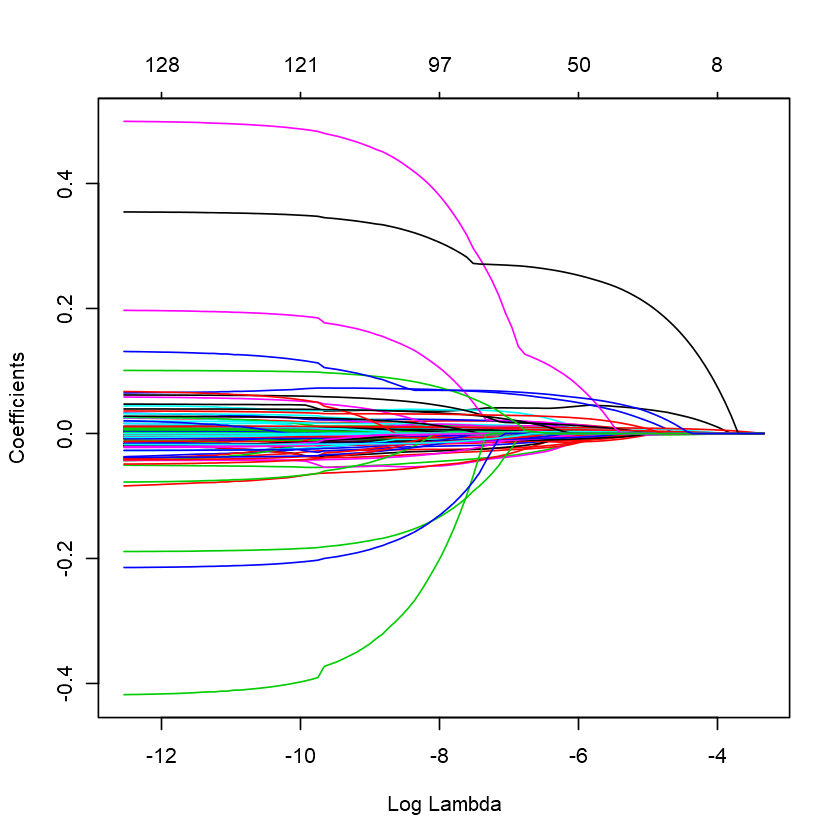

In [41]:
# store the 133 predictor variables as matrix, trim off first column which is the intercept
trainData.matrix <- model.matrix(trainData$V86~., data=trainData)[,-1]
# Fit lasso model on training data
lasso.mod = glmnet(trainData.matrix, trainData$V86, alpha = 1)
# plot coefficients against log lambda
plot(lasso.mod, xvar = "lambda")

We see from the plot that as the shrinkage perimeter (i.e.lambda) increases, the coefficients will gradually approach zero. The issue now will be what should be the value of lambda that we take to decide the ideal number of predictor variables. We can consider the approach of cross validation to select the optimal value of lambda.


The cross-validated optimal lambda value is: 0.003836101

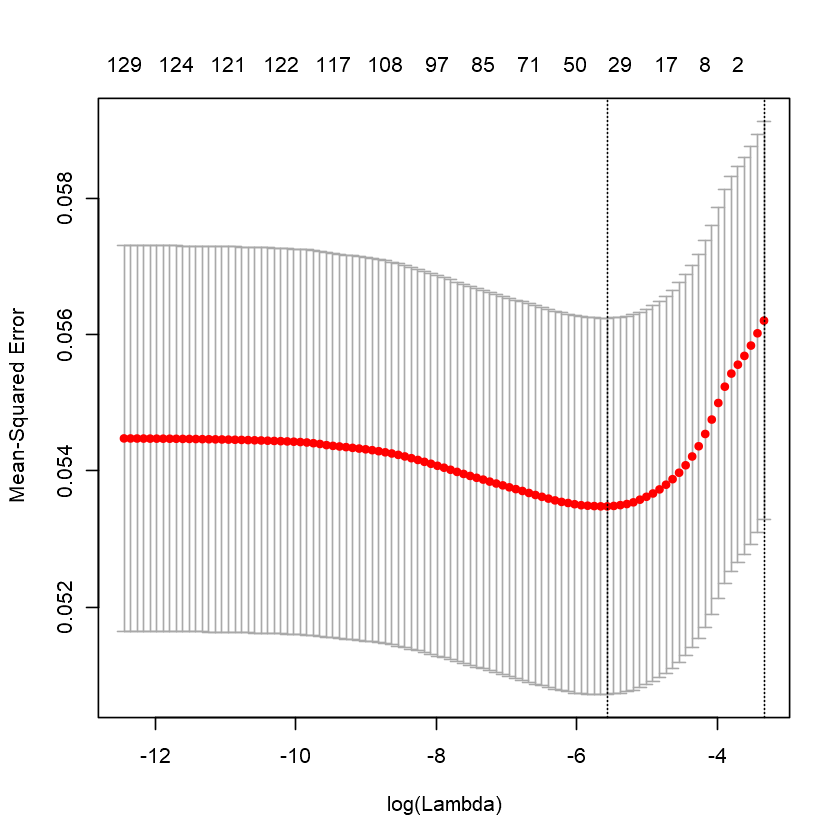

In [42]:
# set seed to get similar result
set.seed(123)
# Fit lasso model with cross validation on training data
lasso.cv.mod = cv.glmnet(trainData.matrix, trainData$V86, alpha = 1)
# plot MSE against log lambda
plot(lasso.cv.mod)

# get the minimum lambda value
bestlam <- lasso.cv.mod$lambda.min
cat("\nThe cross-validated optimal lambda value is:", bestlam)

After running cross-validation, we get the most optimal lambda value to be 0.003836101 in which we can use this lambda value and retrain our Lasso model and identify those predictor variables that have estimated coefficients to be 0.

In [48]:
# use best lambda to predict training data and show estimates of coefficients
cat("\nNumber of variables with non-zero coefficient estimates:", (sum(predict(lasso.mod, s = bestlam, type = "coefficients")!=0))-1)
predict(lasso.mod, s = bestlam, type = "coefficients")[1:132,]


Number of variables with non-zero coefficient estimates: 36

(Intercept)           V12           V13           V14           V15 
-0.0119801194  0.0000000000  0.0103201957  0.0000000000  0.0000000000 
          V16           V17           V18           V19          V110 
 0.0000000000  0.0000000000  0.0442750004  0.0000000000 -0.0035486767 
         V111          V112          V113          V115          V116 
 0.0000000000  0.0393807083  0.0000000000  0.0000000000  0.0000000000 
         V117          V118          V119          V120          V121 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         V122          V123          V124          V125          V126 
 0.0000000000 -0.0079118329  0.0000000000  0.0000000000  0.0000000000 
         V127          V128          V129          V130          V131 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         V132          V133          V134          V135          V136 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
         V137          V138          V139          V140          V141 
 0.0000000000  0.0035852304  0.0000000000  0.0000000000  0.0000000000 
           V2            V3            V4           V52           V53 
 0.0000000000  0.0000000000  0.0000562103  0.0037725045  0.0000000000 
          V54           V55           V56           V57           V58 
-0.0001940789 -0.0025347825  0.0000000000  0.0000000000  0.0000000000 
          V59          V510            V6            V7            V8 
 0.0000000000 -0.0108563288  0.0000000000  0.0008533625  0.0000000000 
           V9           V10           V11           V12           V13 
-0.0005795570  0.0021325446 -0.0002670872  0.0000000000  0.0000000000 
          V14           V15           V16           V17           V18 
 0.0000000000  0.0000000000  0.0028112846  0.0000000000 -0.0028986108 
          V19           V20           V21           V22           V23 
 0.0000000000  0.0000000000 -0.0034476831  0.0000000000  0.0000000000 
          V24           V25           V26           V27           V28 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          V29           V30           V31           V32           V33 
 0.0000000000 -0.0008721427  0.0000000000  0.0016289884  0.0000000000 
          V34           V35           V36           V37           V38 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          V39           V40           V41           V42           V43 
 0.0000000000  0.0004954891 -0.0046523653  0.0028358653  0.0001479212 
          V44           V45           V46           V47           V48 
 0.0081056283  0.0000000000 -0.0063390899  0.0091547574  0.0000000000 
          V49           V50           V51           V52           V53 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          V54           V55           V56           V57           V58 
 0.0000000000  0.0000000000  0.0000000000  0.0083924025  0.0087848229 
          V59           V60           V61           V62           V63 
 0.0055195092  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          V64           V65           V66           V67           V68 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0023817966 
          V69           V70           V71           V72           V73 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000 -0.0026625516 
          V74           V75           V76           V77           V78 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
          V79           V80           V81           V82           V83 
 0.0000000000  0.0000000000  0.0224370417  0.2392289932  0.0199805976 
          V84           V85 
 0.0000000000  0.0505576246

With this optimal lambda value, the number of predictor variables with non-zero coefficient estimates is <b>36</b> (37 - 1 intercept), and these variables are:

1) V1.3 - High status seniors<br>
2) V1.8 - Middle class families<br>
3) V1.10 -  Stable family<br>
4) V1.12 - Affluent young families<br>
5) V1.23 - Young and rising<br>
6) V1.38 - Traditional families<br>
7) V4 - Avg age<br>
8) V5.2 - Driven Growers<br>
9) V5.4 - Career Loners<br>
10) V5.5 - Living well<br>
11) V5.10 - Farmers<br>
12) V7 - Protestant<br>
13) V9 - No religion<br>
14) V10 - Married<br>
15) V11 - Living together<br>
16) V16 - High level educationn<br>
17) V18 - Lower level education<br>
18) V21 - Farmer<br>
19) V30 - Rented house<br>
20) V32 - 1 car<br>
21) V40 - Income 75-122.000<br>
22) V41 - Income >123.000<br>
23) V42 - Average income<br>
24) V43 - Purchasing power class<br>
25) V44 - Contribution private third party insurance<br>
26) V46 - Contribution third party insurane (agriculture)<br>
27) V47 - Contribution car policies<br>
28) V57 - Contribution family accidents insurance policies<br>
29) V58 - Contribution disability insurance policies<br>
30) V59 - Contribution fire policies<br>
31) V68 - Number of car policies<br>
32) V73 - Number of tractor policies<br>
33) V81 - Number of surfboard policies<br>
34) V82 - Number of boat policies<br>
35) V83 - Number of bicycle policies<br>
36) V85 - Number of social security insurance policies<br>

Note that the following 6 variables appeared in all 3 feature selection method:<br>
1) V1.38 - Traditional families<br>
2) V1.12 - Affluent young families<br>
3) V1.38 - Traditional families<br>
4) V4 - Avg age<br>
5) V5.10 - Farmers<br>
6) V68 - Number of car policies<br>

### 3.2 Logistic Regression Model Development
Since the target variable is a discrete value (0 or 1), we first consider a multiple logistic regression model instead of a multiple linear regression model.

### 3.2.1 Logistic Regression Model 1

We first build a model with V86 as the target variable and the all of the attributes as predictors.

In [92]:
fit.glm1<-glm(data=trainData,V86~.,family='binomial')
summary(fit.glm1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = V86 ~ ., family = "binomial", data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7640  -0.3678  -0.2412  -0.1495   3.2925  

Coefficients: (9 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.561e+02  1.120e+04   0.023  0.98175    
V12          3.279e-01  9.642e-01   0.340  0.73378    
V13          4.771e-01  8.307e-01   0.574  0.56574    
V14         -7.817e-01  1.137e+00  -0.688  0.49156    
V15          1.054e-01  1.954e+00   0.054  0.95698    
V16          3.052e-01  4.716e-01   0.647  0.51753    
V17         -5.168e-01  1.016e+00  -0.508  0.61115    
V18          4.539e-01  5.197e-01   0.873  0.38242    
V19          3.781e-02  1.515e+00   0.025  0.98008    
V110        -5.912e-01  5.138e-01  -1.151  0.24991    
V111        -3.509e-02  8.693e-01  -0.040  0.96781    
V112         7.860e-01  6.045e-01   1.300  0.19352    
V113        -2.895e-02  8.383e-01  -0.035  0.9

Observations from this model:
- At 5% significance level, <b>V47 (Contribution car policies), V55 (Contribution life policies), V59 (Contribution fire policies), V76 (Number of life insurances), V82 (Number of boat policies)</b> are significant
- Residual deviance is lesser than null deviance which means this model is more useful compared to one without any predictor variables

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [93]:
with(fit.glm1, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.637453e-36

The p-value is really small which means this model is significantly better than the null model.
<br><br>
Since our task is to predict if a specific customer will buy mobile home policies, we create a confusion matrix by using `confusionMatrix` function from the `caret` library to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [94]:
probs <- predict(fit.glm1, type = "response")
pred.glm1 <- rep(0, length(probs))
pred.glm1[probs > 0.5] <- 1
mobilehome = trainData$V86
confusionMatrix(table(pred.glm1, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm1    0    1
        0 5465  341
        1    9    7
                                          
               Accuracy : 0.9399          
                 95% CI : (0.9335, 0.9459)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.5581          
                                          
                  Kappa : 0.0334          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99836         
            Specificity : 0.02011         
         Pos Pred Value : 0.94127         
         Neg Pred Value : 0.43750         
             Prevalence : 0.94023         
         Detection Rate : 0.93868         
   Detection Prevalence : 0.99725         
      Balanced Accuracy : 0.50924         
                                          
       'Positive' Class : 0               
                                          

This model predicted that 9+7=16 customers will buy mobile home policies and 5465+341=5806 will not buy mobile home policies. Of these observations, 5465 out of (5465+9) which is approximately 99.84% (sensitivity) were correctly predicted by the model that these customers will not buy mobile home policies and they indeed not buy it. Whereas, only 7 out of (7+341) which is approximately 2.01% (specificity) were correctly predicted by the model that these customers will buy mobile home policies and they indeed bought it. Hence, this model has high sensitivity but very low specificity.
<br><br>
Note that even though the accuracy of the model is high at 93.99%, it is expected as since our dataset is highly unbalanced with only 348 (6%) of the customers having bought mobile home policies. If we were to predict that all customers will not purchase mobile home policies, we will still get an overall percentage of 5474/5822 of correct predictions which is approximately 94.02% (i.e. No Information Rate). As a result, what we are aiming for in terms of the training error is a model with high specificity since we are trying to identify the customers that will buy mobile home policies.
<br><br>
We can illustrate the sensitivity and specificity of the model by plotting a Receiver Operating Characteristic (ROC) curve by using the library `pROC`.

Area under the curve: 0.5092

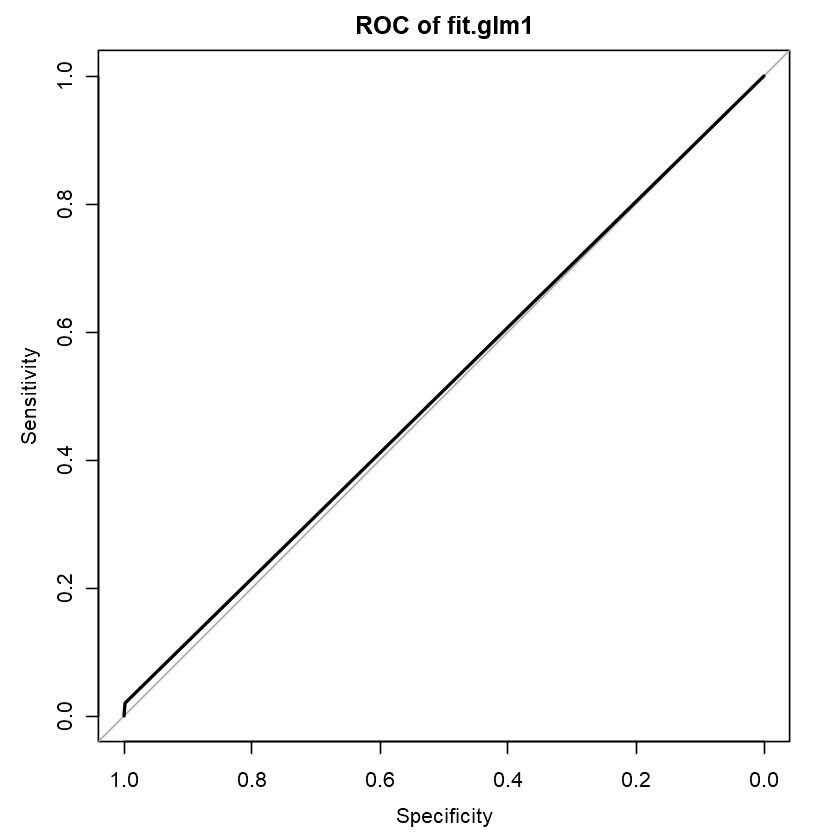

In [100]:
# ROC curve
pred.glm1.ROC <- roc(predictor=pred.glm1,response=trainData$V86)
# show area under the curve
pred.glm1.ROC$auc
plot(pred.glm1.ROC,main="ROC of fit.glm1")

What will be ideal in a ROC curve for a good model is for both the sensitivity and specificity to be close to the left top edge of the curve which means area under the curve is 1$^{[5]}$. However as seen in this plot, the line is far away from the top left edge and area under the curve is only 0.509 which is also obtainable as Balanced Accuracy in the previous Confusion Matrix and Statistics section.

Since we know that our data is highly imbalanced, we can use sampling method like K-Fold Cross Validation approach to get a more accurate value for the accuracy of our model. We will use 10 Fold Cross Validation which involved splitting our training data into 10 folds, and we train 10 models each of them using 9 of the fold as training data and 10th fold as the validation data to get the accuracy of the model. We then obtain the mean of the accuracy of all the 10 models.

In [119]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(trainData), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- trainData[folds$subsets[folds$which != i], ] #Set the training set
  validation <- trainData[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9374768

With 10-Fold Cross Validation, we noted the accuracy of this model is 0.9375.

### 3.2.2 Logistic Regression Model 2

Next, we build a logistic regression model based on the 36 variables identified by Lasso Regularisation.

In [102]:
lasso.var <- trainData[,c(1,4,5,7,9,10,11,16,18,21,30,32,40,41,42,43,44,46,47,57,58,59,68,73,81,82,83,85,86)]
fit.glm2<-glm(data=lasso.var,V86~.,family='binomial')
summary(fit.glm2)


Call:
glm(formula = V86 ~ ., family = "binomial", data = lasso.var)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6682  -0.3704  -0.2490  -0.1660   3.1637  

Coefficients: (9 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.984e+00  2.903e+00  -1.717  0.08599 .  
V12          2.285e-02  8.783e-01   0.026  0.97925    
V13          3.182e-01  7.752e-01   0.411  0.68144    
V14         -6.693e-01  1.065e+00  -0.628  0.52976    
V15         -9.400e-02  1.847e+00  -0.051  0.95940    
V16          3.398e-01  4.484e-01   0.758  0.44859    
V17         -5.045e-01  9.698e-01  -0.520  0.60289    
V18          5.804e-01  4.796e-01   1.210  0.22620    
V19         -4.620e-02  1.419e+00  -0.033  0.97403    
V110        -4.283e-01  4.779e-01  -0.896  0.37016    
V111        -2.660e-02  8.093e-01  -0.033  0.97378    
V112         8.187e-01  5.572e-01   1.469  0.14177    
V113         3.551e-02  7.871e-01   0.045  0.9

Observations from this model:
- At 5% significance level, <b>V18 (Lower level education), V41 (MINK123M Income >123.000), V47 (Contribution car policies), V58 (Contribution disability insurance policies), V59 (Contribution fire policies), V82 (Number of boat policies), V83 (Number of bicycle policies)</b> are significant.
- Residual deviance of 2260.5 is higher than the previous model of 2204.1

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [103]:
with(fit.glm2, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.721986e-45

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot a Receiver Operating Characteristic (ROC) curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [115]:
probs <- predict(fit.glm2, type = "response")
pred.glm2 <- rep(0, length(probs))
pred.glm2[probs > 0.5] <- 1
mobilehome = lasso.var$V86
confusionMatrix(table(pred.glm2, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm2    0    1
        0 5463  343
        1   11    5
                                          
               Accuracy : 0.9392          
                 95% CI : (0.9327, 0.9452)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.643           
                                          
                  Kappa : 0.0223          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99799         
            Specificity : 0.01437         
         Pos Pred Value : 0.94092         
         Neg Pred Value : 0.31250         
             Prevalence : 0.94023         
         Detection Rate : 0.93834         
   Detection Prevalence : 0.99725         
      Balanced Accuracy : 0.50618         
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.5062

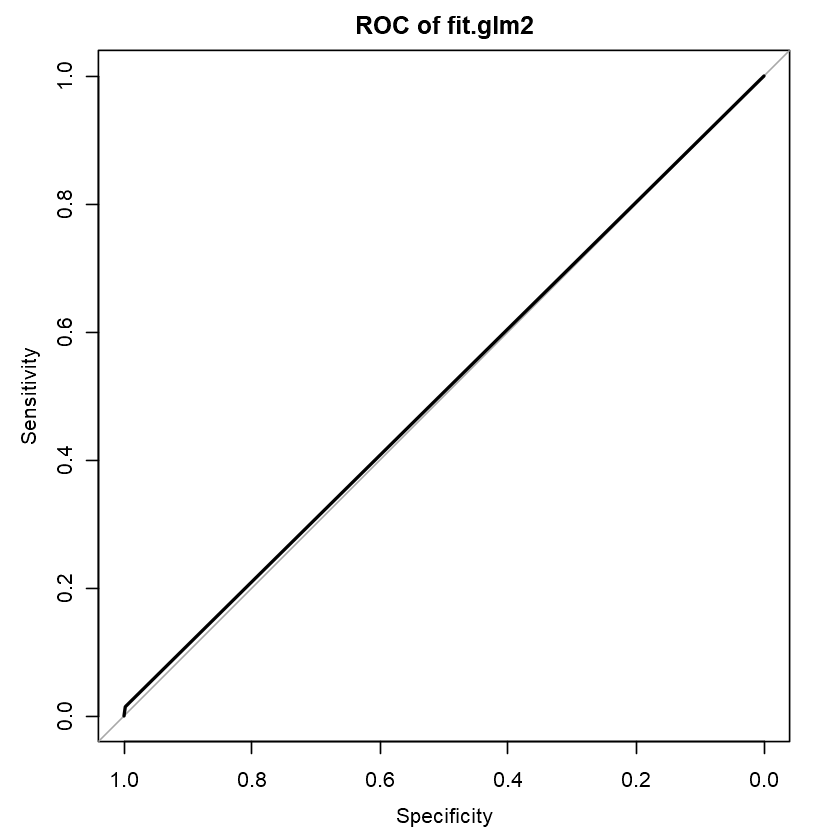

In [112]:
# ROC curve
pred.glm2.ROC <- roc(predictor=pred.glm2,response=trainData$V86)
# show area under the curve
pred.glm2.ROC$auc
plot(pred.glm2.ROC,main="ROC of fit.glm2")

The sensitivity remains the same at 99.8%. The specificity dropped slightly from 2.01% to 1.44%. From the ROC curve, area under the curve is 0.506 which is only slightly lower than the full model at 0.509.
<br><br>
We can run the `anova()` function to compare the two models and see if they are statistically different.

In [106]:
anova(fit.glm2, fit.glm1, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5756,2260.474,NA,NA,NA
5699,2204.056,57,56.41797,0.4968703


The anova test suggest we cannot reject the null hypothesis since the p-value is quite large. It is not statistically significant that the difference between the full model and the model with only the coefficients strongly associated with the response. In regard to the interpretability of the model, we'd prefer this model as the complexity is a lot lower with less predictors.

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [120]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(lasso.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- lasso.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- lasso.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9385074

The cross-validated accuracy of this model is slightly higher than the first model at 0.9375. As mentioned earlier, even though this 2 models are not statistically different, we see that in terms of accuracy and model complexity, we will choose this model over the first model.

### 3.2.3 Logistic Regression Model 3

Next, we build a logistic regression model based on the 25 variables identified by Forward Subset Selection.

In [108]:
fss.var <- trainData[,c(1,4,5,14,16,19,25,27,37,50,51,52,53,56,66,67,68,76,86)]
fit.glm3<-glm(data=fss.var,V86~.,family='binomial')
summary(fit.glm3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = V86 ~ ., family = "binomial", data = fss.var)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9909  -0.3810  -0.2849  -0.2080   3.0123  

Coefficients: (9 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.564e+00  4.889e-01  -7.291 3.08e-13 ***
V12          7.865e-02  5.614e-01   0.140   0.8886    
V13          3.382e-01  3.922e-01   0.862   0.3884    
V14         -7.132e-01  7.952e-01  -0.897   0.3698    
V15         -3.685e-01  8.012e-01  -0.460   0.6456    
V16          2.227e-01  4.398e-01   0.506   0.6125    
V17         -1.702e-01  6.895e-01  -0.247   0.8051    
V18          6.334e-01  3.559e-01   1.780   0.0751 .  
V19         -3.869e-01  4.574e-01  -0.846   0.3977    
V110        -4.513e-01  4.805e-01  -0.939   0.3476    
V111        -1.346e-01  4.839e-01  -0.278   0.7810    
V112         7.816e-01  4.385e-01   1.782   0.0747 .  
V113        -1.199e-01  4.349e-01  -0.276   0.78

Observations from this model:
- At 5% significance level, <b>V1.23 (Cust Subtype - Young and rising), V16 (High level education), V37 (Income < 30.000), V68 (Number of car policies)</b> are significant.
- Residual deviance of 2382.0 which is higher than the previous 2 models.

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [111]:
with(fit.glm3, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 2.844559e-27

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot a Receiver Operating Characteristic (ROC) curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [116]:
probs <- predict(fit.glm3, type = "response")
pred.glm3 <- rep(0, length(probs))
pred.glm3[probs > 0.5] <- 1
mobilehome = fss.var$V86
confusionMatrix(table(pred.glm3, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm3    0    1
        0 5470  348
        1    4    0
                                          
               Accuracy : 0.9395          
                 95% CI : (0.9331, 0.9455)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.6012          
                                          
                  Kappa : -0.0014         
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9993          
            Specificity : 0.0000          
         Pos Pred Value : 0.9402          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9402          
         Detection Rate : 0.9395          
   Detection Prevalence : 0.9993          
      Balanced Accuracy : 0.4996          
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.4996

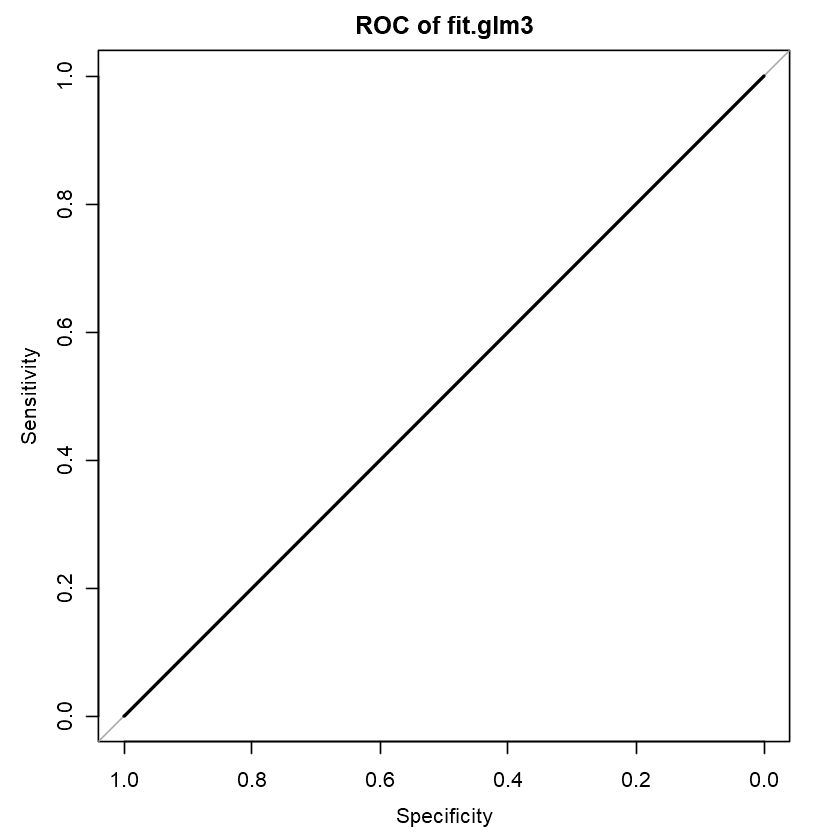

In [117]:
# ROC curve
pred.glm3.ROC <- roc(predictor=pred.glm3,response=trainData$V86)
# show area under the curve
pred.glm3.ROC$auc
plot(pred.glm3.ROC,main="ROC of fit.glm3")

The sensitivity increases slightly to 99.9%. The specificity decreased to 0%. ROC is 0.4996 which is the lowest thus far.
<br><br>
We can run the `anova()` function to compare this model and the full model and see if they are statistically different.

In [118]:
anova(fit.glm3, fit.glm1, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5766,2381.990,NA,NA,NA
5699,2204.056,67,177.9334,5.340899e-12


The anova test shows that this model is statistically different from the full model since p-value is low. This is expected as the reduction in number of predictor variables is significant.

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [122]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(fss.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- fss.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- fss.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9393659

The cross validated accuracy is 0.9394 which is higher than both the previous models, but note that specificity here is 0% which is the main goal of our prediction task to make it as high as possible. Hence as of now, the 2nd model is still the most preferred one.

### 3.2.4 Logistic Regression Model 4

We do the similar to build a logistic regression model based on the 21 variables identified by Backward Subset Selection.

In [123]:
bss.var <- trainData[,c(1,4,5,19,27,30,39,50,53,55,56,64,66,67,68,85,86)]
fit.glm4<-glm(data=bss.var,V86~.,family='binomial')
summary(fit.glm4)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = V86 ~ ., family = "binomial", data = bss.var)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1155  -0.3830  -0.2814  -0.2119   2.9570  

Coefficients: (9 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.424e+00  5.011e-01  -6.834 8.25e-12 ***
V12          1.765e-02  5.462e-01   0.032   0.9742    
V13          1.742e-01  3.842e-01   0.453   0.6503    
V14         -7.902e-01  7.936e-01  -0.996   0.3194    
V15         -4.402e-01  8.003e-01  -0.550   0.5822    
V16          1.902e-01  4.404e-01   0.432   0.6659    
V17         -2.282e-01  6.886e-01  -0.331   0.7403    
V18          6.288e-01  3.555e-01   1.769   0.0769 .  
V19         -3.257e-01  4.641e-01  -0.702   0.4828    
V110        -4.281e-01  4.782e-01  -0.895   0.3707    
V111        -2.769e-01  4.789e-01  -0.578   0.5632    
V112         7.505e-01  4.367e-01   1.719   0.0857 .  
V113        -4.806e-02  4.368e-01  -0.110   0.91

Observations from this model:
- At 5% significance level, <b>V1.23 (Cust Subtype - Young and rising), V30 (Rented house), V68 (Number of car policies)</b> are significant.
- Residual deviance of 2389.4 is the highest thus far.

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [125]:
with(fit.glm4, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 1.124939e-26

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot a Receiver Operating Characteristic (ROC) curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [129]:
probs <- predict(fit.glm4, type = "response")
pred.glm4 <- rep(0, length(probs))
pred.glm4[probs > 0.5] <- 1
mobilehome = trainData$V86
confusionMatrix(table(pred.glm4, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm4    0    1
        0 5468  348
        1    6    0
                                          
               Accuracy : 0.9392          
                 95% CI : (0.9327, 0.9452)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.643           
                                          
                  Kappa : -0.002          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9989          
            Specificity : 0.0000          
         Pos Pred Value : 0.9402          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9402          
         Detection Rate : 0.9392          
   Detection Prevalence : 0.9990          
      Balanced Accuracy : 0.4995          
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.4995

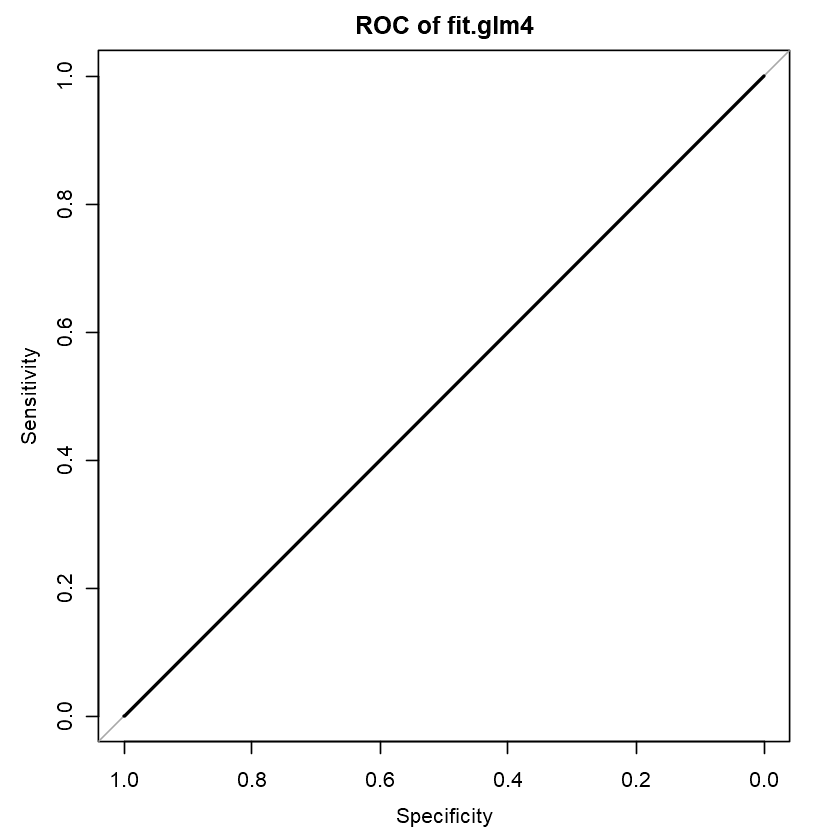

In [130]:
# ROC curve
pred.glm4.ROC <- roc(predictor=pred.glm4,response=trainData$V86)
# show area under the curve
pred.glm4.ROC$auc
plot(pred.glm4.ROC,main="ROC of fit.glm4")

The sensitivity remains the same at 99.9%. The specificity remains at 0%.
<br><br>
We can run the `anova()` function to compare this model and the full model and see if they are statistically different.

In [131]:
anova(fit.glm4, fit.glm1, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5768,2389.384,NA,NA,NA
5699,2204.056,69,185.328,1.368182e-12


The anova test shows that this model is statistically different to the full model since p-value is low (i.e. <0.05). 

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [132]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(bss.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- bss.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- bss.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9390223

Accuracy is slightly lower than the previous model at 0.9394. Since specificity again is 0%, even though the accuracy of this model is better than the second model, the second model is still not preferrable as specificity in 2nd model is slightly higher.

|Model |No.of Attributes|Attributes|Significant Attributes at 5% signficance level|Residual Deviance|CV Accuracy|Specificity|ROC|
|------|----------------|----------|----------------------------------------------|----------|----------|----------|---|
|3.2.1 Full Model|85|All|V47, V55, V59, V76, V82|2204.1|93.75%|2.01%|0.509|
|<b>3.2.2 Lasso Identified</b>|<b>36</b>|<b>V1, V4, V5, V7, V9, V10, V11, V16, V18, V21, V30, V32, V40, V41, V42, V43, V44, V46, V47, V57, V58, V59, V68, V73, V81, V82, V83, V85</b>|<b>V18, V41, V47, V58, V59, V82, V83</b>|<b>2260.5</b>|<b>93.85%</b>|<b>1.44%</b>|<b>0.506</b>|
|3.2.3 Forward Subset Selection Identified|25|V1, V4, V5, V14, V16, V19, V25, V27, V37, V50, V51, V52, V53, V56, V66, V67, V68, V76|V1.23, V16, V37, V68|2382.0|93.94%|0.00%|0.4996|
|3.2.4 Backward Subset Selection Identified|21|V1, V4, V5, V19, V27, V30, V39, V50, V53, V55, V56, V64, V66, V67, V68, V85|V1.23, V30, V68|2389.4|93.9%|0.00%|0.4995|

Out of these 4 logistic regression models thus far, the one with the best accuracy is the 4th model and the one with the best specificity is our full model. However as mentioned earlier, the 4th model has 0% specificty which is why the second model is more preferred over it. In terms of complexity, the 2nd model is less complex compared to the full model and it's accuracy is also higher. Therefore, currently the best model is the 2nd model.

Now, let's try modelling another logistic regression model based on the only the significant attributes identified in the 2nd model.

### 3.2.5 Logistic Regression Model 5

In [10]:
# get the 7 significant attributes and the target attribute
sig.var <- trainData[,c(18,41,47,58,59,82,83,86)]
fit.glm5<-glm(data=sig.var,V86~.,family='binomial')
summary(fit.glm5)


Call:
glm(formula = V86 ~ ., family = "binomial", data = sig.var)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5033  -0.3964  -0.2660  -0.1887   3.1256  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.33290    0.17137 -19.448  < 2e-16 ***
V18         -0.17157    0.02554  -6.719 1.83e-11 ***
V41         -0.14756    0.10900  -1.354   0.1758    
V47          0.23726    0.02356  10.072  < 2e-16 ***
V58          0.17276    0.10034   1.722   0.0851 .  
V59          0.16425    0.02986   5.501 3.78e-08 ***
V82          1.99223    0.36671   5.433 5.55e-08 ***
V83          0.53968    0.19792   2.727   0.0064 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2376.7  on 5814  degrees of freedom
AIC: 2392.7

Number of Fisher Scoring iterations: 6


Observations from this model:
- At 5% significance level, <b>V18 (Lower level education), V47 (Contribution car policies), V59 (Contribution fire policies), V82 (Number of boat policies), V83 (Number of bicycle policies)</b> are significant.
- Residual deviance of 2376.7 which is higher than the 2nd model.

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [145]:
with(fit.glm5, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.681501e-52

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot the ROC curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [11]:
probs <- predict(fit.glm5, type = "response")
pred.glm5 <- rep(0, length(probs))
pred.glm5[probs > 0.5] <- 1
mobilehome = trainData$V86
confusionMatrix(table(pred.glm5, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm5    0    1
        0 5467  345
        1    7    3
                                          
               Accuracy : 0.9395          
                 95% CI : (0.9331, 0.9455)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.6012          
                                          
                  Kappa : 0.0135          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.998721        
            Specificity : 0.008621        
         Pos Pred Value : 0.940640        
         Neg Pred Value : 0.300000        
             Prevalence : 0.940227        
         Detection Rate : 0.939024        
   Detection Prevalence : 0.998282        
      Balanced Accuracy : 0.503671        
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.5037

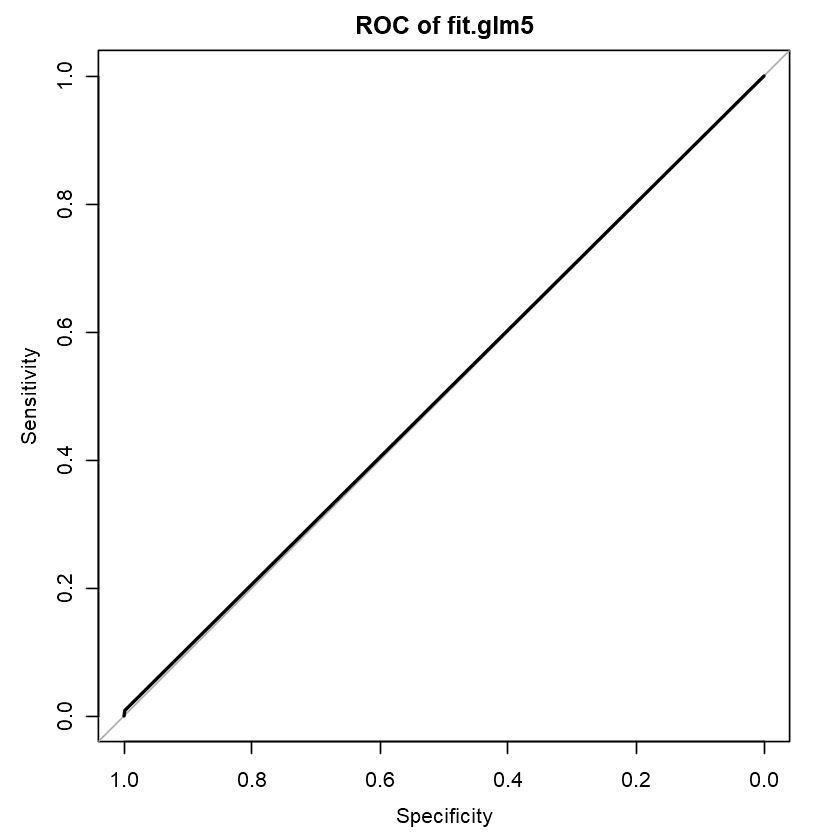

In [148]:
# ROC curve
pred.glm5.ROC <- roc(predictor=pred.glm5, response=trainData$V86)
# show area under the curve
pred.glm5.ROC$auc
plot(pred.glm5.ROC,main="ROC of fit.glm5")

The sensitivity increased slightly from 99.8% to 99.9%. The specificity decreased slightly from 1.44% to 0.8621%.
<br><br>
We can run the `anova()` function to compare this model and the 2nd model and see if they are statistically different.

In [150]:
anova(fit.glm5, fit.glm2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5814,2376.727,NA,NA,NA
5756,2260.474,58,116.2524,8.870931e-06


The anova test shows that this model is statistically different compared to the 2nd model since p-value is low (i.e. <0.05). 

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [12]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9395381

The cross-validated accuracy is the highest thus far, and is slightly higher than the 2nd model at 0.9385.

### 3.2.6 Logistic Regression Model 6

Let's add in interaction variables to the model in 3.2.5. Based on the correlation matrix in Section 2 and the exploration in the product ownership attributes, we have identified the following 3 policies that were also purchased by customers who purchased mobile home policies:<br>

- V65 - Number of private third party insurance<br>
- V68 - Number of car policies<br>
- V80 - Number of fire policies

We add the following interaction effects between these 3 into our model:<br>
- V65 - Number of private third party insurance : V68 - Number of car policies</b>
- V65 - Number of private third party insurance : V80 - Number of fire policies</b>
- V68 - Number of car policies : V80 - Number of fire policies</b>

Note that in order to add interaction variables, we need to ensure the variables themselves are included in the model as well. Hence, we will need to add in <b>V65, V68, V80</b> into our previous model.

In [4]:
# get the 10 variables and the target variable
sig.var.int <- trainData[,c(18,41,47,58,59,65,68,80,82,83,86)]
fit.glm6<-glm(data=sig.var.int,V86~.+V65:V68+V65:V80+V68:V80,family='binomial')
summary(fit.glm6)


Call:
glm(formula = V86 ~ . + V65:V68 + V65:V80 + V68:V80, family = "binomial", 
    data = sig.var.int)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5669  -0.3821  -0.2601  -0.1931   2.9981  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.97585    0.19723 -15.088  < 2e-16 ***
V18         -0.16614    0.02563  -6.482 9.07e-11 ***
V41         -0.14877    0.10989  -1.354  0.17581    
V47          0.26145    0.04409   5.930 3.02e-09 ***
V58          0.19216    0.10237   1.877  0.06049 .  
V59          0.19517    0.06519   2.994  0.00276 ** 
V65          0.10490    0.30527   0.344  0.73113    
V68         -0.67485    0.28060  -2.405  0.01617 *  
V80         -0.76375    0.33211  -2.300  0.02147 *  
V82          2.00869    0.37106   5.413 6.18e-08 ***
V83          0.47096    0.19844   2.373  0.01763 *  
V65:V68      0.35685    0.21503   1.660  0.09700 .  
V65:V80     -0.06827    0.27901  -0.245  0.80669    
V68:V80      0.54388   

Observations from this model:
- At 5% significance level, <b>V18 (Lower level education), V47 (Contribution car policies), V59 (Contribution fire policies), V68 (Number of car policies), V80 Number of fire policies, V82 (Number of boat policies), V83 (Number of bicycle policies), interaction of V68:V80 </b> are significant.
- Residual deviance of 2355.5 is lower than previous model at 2376.7.

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [5]:
with(fit.glm6, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.484056e-52

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot a ROC curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [155]:
probs <- predict(fit.glm6, type = "response")
pred.glm6 <- rep(0, length(probs))
pred.glm6[probs > 0.5] <- 1
mobilehome = trainData$V86
confusionMatrix(table(pred.glm6, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm6    0    1
        0 5468  345
        1    6    3
                                          
               Accuracy : 0.9397          
                 95% CI : (0.9333, 0.9457)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.5798          
                                          
                  Kappa : 0.0138          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.998904        
            Specificity : 0.008621        
         Pos Pred Value : 0.940650        
         Neg Pred Value : 0.333333        
             Prevalence : 0.940227        
         Detection Rate : 0.939196        
   Detection Prevalence : 0.998454        
      Balanced Accuracy : 0.503762        
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.5038

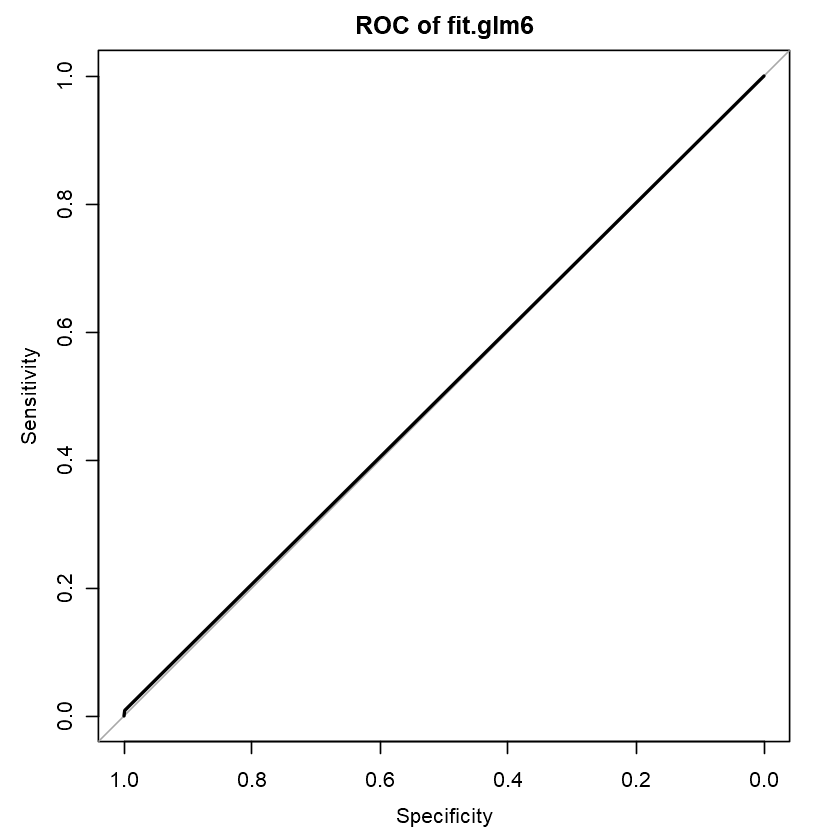

In [164]:
# ROC curve
pred.glm6.ROC <- roc(predictor=pred.glm6, response=trainData$V86)
# show area under the curve
pred.glm6.ROC$auc
plot(pred.glm6.ROC,main="ROC of fit.glm6")

The sensitivity remains at 99.9% and specificity remains at 0.8621%. ROC is similar at 0.504 as well.
<br><br>
We can run the `anova()` function to compare this model and the previous model and see if they are statistically different since the accuracy, sensitiviy and specificity are similar compared to the previous model.

In [162]:
anova(fit.glm5, fit.glm6, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5814,2376.727,NA,NA,NA
5808,2355.452,6,21.27462,0.001637362


The anova test shows that this model is statistically different to the previous model since p-value is low. 

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [6]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var.int), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var.int[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var.int[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.+V65:V68+V65:V80+V68:V80,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9393662

The cross-validated accuracy is 0.9394 which is only slightly lower than the previous model without interaction variables at 0.9395. Sensitivity, specificity and ROC is the same for both models. As a result, in terms of model complexity, the previous model is still more preferrable even though the anova test suggested the two models are statistically different.

### 3.2.7 Logistic Regression Model 7

We saw in the previous model that the only interaction that is significant was:<br>
<b>- V68 - Number of car policies : V80 - Number of fire policies</b>

Hence, we will just add this interaction into our 5th model.

Again, we will need to add <b>V68, V80</b> into our 5th model since we are considering it's interaction effect.

In [7]:
# get the 9 variables and the target variable
sig.var.int2 <- trainData[,c(18,41,47,58,59,68,80,82,83,86)]
fit.glm7<-glm(data=sig.var.int2,V86~.+V68:V80,family='binomial')
summary(fit.glm7)


Call:
glm(formula = V86 ~ . + V68:V80, family = "binomial", data = sig.var.int2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5382  -0.3843  -0.2647  -0.1935   3.0028  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.96205    0.19290 -15.355  < 2e-16 ***
V18         -0.17058    0.02560  -6.663 2.68e-11 ***
V41         -0.14747    0.10979  -1.343  0.17919    
V47          0.27780    0.04315   6.438 1.21e-10 ***
V58          0.17242    0.10300   1.674  0.09414 .  
V59          0.19334    0.06122   3.158  0.00159 ** 
V68         -0.67383    0.27362  -2.463  0.01379 *  
V80         -0.71113    0.28407  -2.503  0.01230 *  
V82          1.94140    0.36916   5.259 1.45e-07 ***
V83          0.48407    0.19751   2.451  0.01425 *  
V68:V80      0.70420    0.21982   3.204  0.00136 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  

Observations from this model:
- At 5% significance level, <b>V18 (Lower level education), V47 (Contribution car policies), V59 (Contribution fire policies), V68 (Number of car policies), V80 Number of fire policies, V82 (Number of boat policies), V83 (Number of bicycle policies), interaction of V68:V80 </b> are significant.
- The significant variables are the same as in model 6 in 3.2.6.
- Residual deviance of 2365.0 is lower than 5th model at 2376.7, though higher than the 6th model at 2355.5.

We can use the Chisq test to check how well is the logistic regression model in comparison with a null model. 

In [168]:
with(fit.glm7, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 2.570731e-52

The p-value is really small which means this model is significantly better than the null model.
<br><br>
We create a confusion matrix and plot a ROC curve to show how many predictions this model has made correctly and incorrectly in our training dataset.

In [169]:
probs <- predict(fit.glm7, type = "response")
pred.glm7 <- rep(0, length(probs))
pred.glm7[probs > 0.5] <- 1
mobilehome = trainData$V86
confusionMatrix(table(pred.glm7, mobilehome), positive='0')

Confusion Matrix and Statistics

         mobilehome
pred.glm7    0    1
        0 5466  345
        1    8    3
                                          
               Accuracy : 0.9394          
                 95% CI : (0.9329, 0.9454)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.6223          
                                          
                  Kappa : 0.0131          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.998539        
            Specificity : 0.008621        
         Pos Pred Value : 0.940630        
         Neg Pred Value : 0.272727        
             Prevalence : 0.940227        
         Detection Rate : 0.938853        
   Detection Prevalence : 0.998111        
      Balanced Accuracy : 0.503580        
                                          
       'Positive' Class : 0               
                                          

Area under the curve: 0.5036

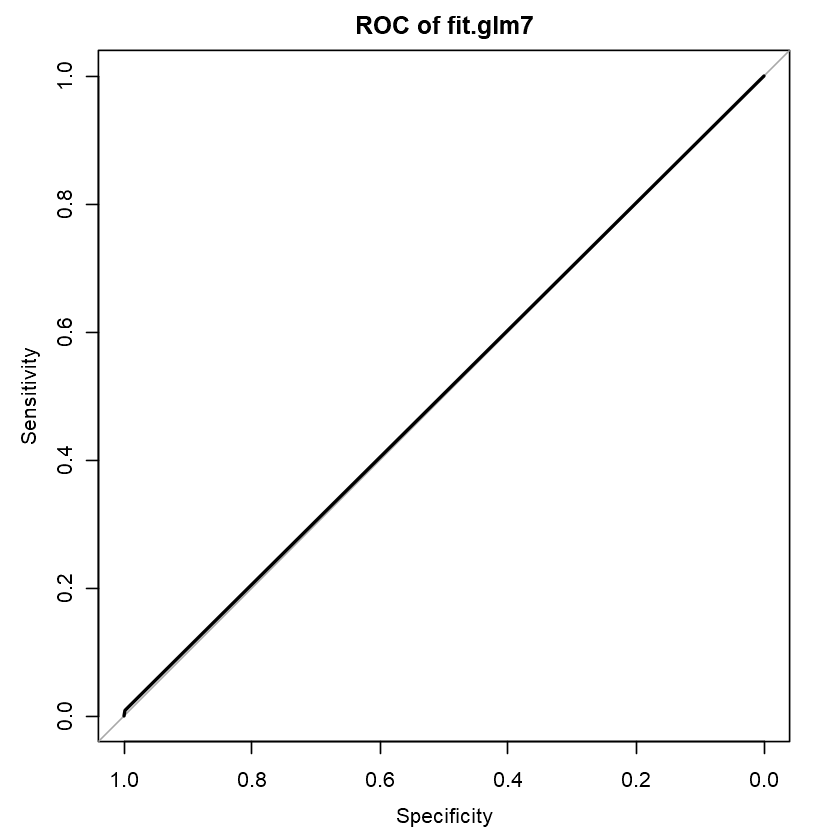

In [171]:
# ROC curve
pred.glm7.ROC <- roc(predictor=pred.glm7, response=trainData$V86)
# show area under the curve
pred.glm7.ROC$auc
plot(pred.glm7.ROC,main="ROC of fit.glm7")

The sensitivity remains at 99.9%. The specificity remains at 0.8621%. ROC remains at 0.504.
<br><br>
We can run the `anova()` function to compare this model and the 5th model and see if they are statistically different since the accuracy, sensitiviy and specificity are similar compared to the previous model.

In [172]:
anova(fit.glm5, fit.glm7, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
5814,2376.727,NA,NA,NA
5811,2364.998,3,11.7284,0.008373877


The anova test shows that this model is statistically different to the previous model since p-value is low. 

Again, we use 10-Fold Cross Validation Sampling Method to check our accuracy of the model.

In [8]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var.int2), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var.int2[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var.int2[folds$subsets[folds$which == i], ] #Set the validation set

  fit.glm <- glm(data=train,V86~.+V68:V80,family='binomial') # Fit model with current training set
  probs <- predict(fit.glm, newdata = validation, type = "response") # Get predictions prob using validation set
  pred.glm <- rep(0, length(probs))
  pred.glm[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.glm==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9395381

The cross validated accuracy of this model is similar to the 5th model, with the same sensitivity, specificity and ROC. Even though anova test suggested the two models are statistically different, in terms of model complexity, the 5th model is still more preferred over this with lesser number of predictor variables.

Our best model thus far is the 5th model which includes the significant variables identified in the first 4 models. We can consider the variance inflation factors to see if there are any variables that we can consider to remove to simplify our model.

Variance Inflation Factor is a measure of how much the variance of the estimated regression coefficient is "inflated" by the existence of correlation among the predictor variables in the model.

A VIF of 1 means that there is no correlation among the k-th predictor and the remaining predictor variables, and hence the variance of the k-th coefficient is not inflated at all. The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction $^{[6]}$.

We use the `vif` function from the `car` library to determine the VIF.

In [13]:
vif(fit.glm5)

V18      V41      V47      V58      V59      V82      V83 
1.030302 1.030091 1.012934 1.016000 1.026758 1.001139 1.003377

As seen, all the 7 variables that were fitted in the 5th model have VIF of around 1 which means there is no correlation among the k-th predictor and the remaining predictor variables. Hence, we will stick to the same model parameters for model 5 and keep it as the best model for our logistic regression.

### 3.3 Linear Discriminant Analysis Model Development

The 2nd type of model we can consider is Linear Discriminant Analysis (LDA) which is closely connected to Logistic Regression in which both produce linear decision boundaries that separate a class from another. The only difference is LDA will assume that the observations are drawn from Gaussian Distribution with a common covariance matrix in each class, and if this assumption is true, it will perform better than the Logisitc Regression $^{[7]}$.

### 3.3.1 Linear Discriminant Analysis Model 1
We first fit a LDA model with the full set of variables and show the confusion matrix to find out the specificity and sensitivity.

In [14]:
# fit lda
fit.lda1 = lda(data=trainData,V86~.)
# predict training data target labels
pred.lda1 = predict(fit.lda1, type = "response")
# show confusion matrix
confusionMatrix(table(pred.lda1$class, trainData$V86), positive='0')

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

Confusion Matrix and Statistics

   
       0    1
  0 5428  321
  1   46   27
                                          
               Accuracy : 0.937           
                 95% CI : (0.9304, 0.9431)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.8592          
                                          
                  Kappa : 0.1098          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99160         
            Specificity : 0.07759         
         Pos Pred Value : 0.94416         
         Neg Pred Value : 0.36986         
             Prevalence : 0.94023         
         Detection Rate : 0.93233         
   Detection Prevalence : 0.98746         
      Balanced Accuracy : 0.53459         
                                          
       'Positive' Class : 0               
                                          

We see that the sensitivity is 99.2% and specificity 7.8%. Comparing this full LDA model with the full Logistic Regression model, although the sensitivity of the LDA model is lower, it's specificity is higher than 2.01% in the full Logisitic Regression model. If two or more variables are almost a linear combination to each other, their estimated coefficients will be close to 0 which makes it hard to interpret entirely their effects on the target variable$^{[8]}$. It is worthy to note that we should avoid variables that are highly correlated to each other in fitting LDA.

Also note that there is a warning message of "variables are collinear" while fitting the LDA model with the full dataset which means some of our predictor variables are correlated to each other which was what was already explored in the EDA section.  

Let's use 10-Fold Cross Validation Sampling method to get the accuracy of the this model.

In [23]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(trainData), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- trainData[folds$subsets[folds$which != i], ] #Set the training set
  validation <- trainData[folds$subsets[folds$which == i], ] #Set the validation set

  fit.lda = lda(data=train,V86~.) # Fit model with current training set
  probs <- predict(fit.lda, newdata = validation, type="response")$posterior[,2] # Get predictions prob using validation set
  pred.lda <- rep(0, length(probs))
  pred.lda[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.lda==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9324972

The accuracy of this model is 93.25%. If we were to compare this model to the 7 models fitted in the logistic regression in Section 3.2, this model is currently the best in terms of specificity as it is able to predict correctly 7.76% of the customers who indeed bought mobile home policies, which is the main aim for our prediction task, although the accuracy of the this model is lower than all the models in logistic regression.

### 3.3.2 Linear Discriminant Analysis Model 2

Next, we try to fit the 7 variables that were identified in model 5 in Section 3.2.5 which gave the best Logisitic Regression Model in terms of model complexity and testing specificity.

In [13]:
# fit lda
fit.lda2 = lda(data=sig.var,V86~.)
# predict training data target labels
pred.lda2 = predict(fit.lda2, type = "response")
# show confusion matrix
confusionMatrix(table(pred.lda2$class, trainData$V86), positive='0')

Confusion Matrix and Statistics

   
       0    1
  0 5448  334
  1   26   14
                                          
               Accuracy : 0.9382          
                 95% CI : (0.9317, 0.9442)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.7566          
                                          
                  Kappa : 0.0606          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99525         
            Specificity : 0.04023         
         Pos Pred Value : 0.94223         
         Neg Pred Value : 0.35000         
             Prevalence : 0.94023         
         Detection Rate : 0.93576         
   Detection Prevalence : 0.99313         
      Balanced Accuracy : 0.51774         
                                          
       'Positive' Class : 0               
                                          

Sensitivity is 99.5% and specificity 4.02%. ROC (balanced accuracy) is 0.518. This model performs worse in terms of specificity and better in terms of sensitivity than the full LDA model.

Note that we did not receive the warning message of "variables are collinear" in this model as the 7 variables fitted between them has non-significant correlation between them, which was explored in the Variable Inflation Factor (VIF) in Section 3.2.7.

Let's perform 10 Fold Cross Validation to get the mean accuracy of this model.

In [25]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.lda = lda(data=train,V86~.) # Fit model with current training set
  probs <- predict(fit.lda, newdata = validation, type="response")$posterior[,2] # Get predictions prob using validation set
  pred.lda <- rep(0, length(probs))
  pred.lda[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.lda==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9376489

Accuracy of this model is 0.9376 which is higher than the previous model at 0.9325, but still lower than all the models in logistic regression.

### 3.3.3 Linear Discriminant Analysis Model 3

We then try adding the interaction effect which we found was significant into the previous model.
- <b>V68 (Number of car policies) : V80 (Number of fire policies)</b>

In [26]:
# fit lda
fit.lda3 = lda(data=sig.var.int2,V86~.+V68:V80)
# predict training data target labels
pred.lda3 = predict(fit.lda3, type = "response")
# show confusion matrix
confusionMatrix(table(pred.lda3$class, trainData$V86), positive='0')

Confusion Matrix and Statistics

   
       0    1
  0 5442  334
  1   32   14
                                          
               Accuracy : 0.9371          
                 95% CI : (0.9306, 0.9432)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 0.8467          
                                          
                  Kappa : 0.0579          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99415         
            Specificity : 0.04023         
         Pos Pred Value : 0.94217         
         Neg Pred Value : 0.30435         
             Prevalence : 0.94023         
         Detection Rate : 0.93473         
   Detection Prevalence : 0.99210         
      Balanced Accuracy : 0.51719         
                                          
       'Positive' Class : 0               
                                          

Sensitivity dropped slightly to 99.4 and specificity remained at 4.023%. Intuitively, this model is worse than the previous model.

Let's get the mean accuracy of this model from 10-Fold Cross Validation.

In [27]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var.int2), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var.int2[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var.int2[folds$subsets[folds$which == i], ] #Set the validation set

  fit.lda = lda(data=train,V86~.+V68:V80) # Fit model with current training set
  probs <- predict(fit.lda, newdata = validation, type="response")$posterior[,2] # Get predictions prob using validation set
  pred.lda <- rep(0, length(probs))
  pred.lda[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.lda==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9369616

Accuracy of this model is 0.9370 which is lower than the previous model at 0.9376.

Hence out of the 3 LDA models, the 2nd model is the best in terms of model accuracy.

### 3.4 Linear Discriminant Analysis Model Development

The 3rd type of model we can consider is Quadratic Discriminant Analysis (QDA). In Linear Discriminant Analysis, we assume that the observations are drawn from Gaussian Distribution with a common covariance matrix in each class. However in QDA, this assumption does not hold as each class is allowed to have different covariance matrix.

### 3.4.1 Quadratic Discriminant Analysis Model 1
In both of our Logistic Regression and Linear Discriminant Analysis model development, we found out that the best model respectively is the one using the 7 variables that were deemed significant from Lasso regression, Forward Stepwise Selection and Backward Stepwise Selection. Hence, we first train our QDA model using this set of 7 variables.

In [15]:
# fit qda
fit.qda1 = qda(data=sig.var,V86~.)
# predict training data target labels
pred.qda1 = predict(fit.qda1, type = "response")
# show confusion matrix
confusionMatrix(table(pred.qda1$class, trainData$V86), positive='0')

Confusion Matrix and Statistics

   
       0    1
  0 5304  316
  1  170   32
                                          
               Accuracy : 0.9165          
                 95% CI : (0.9091, 0.9235)
    No Information Rate : 0.9402          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0758          
 Mcnemar's Test P-Value : 4.79e-11        
                                          
            Sensitivity : 0.96894         
            Specificity : 0.09195         
         Pos Pred Value : 0.94377         
         Neg Pred Value : 0.15842         
             Prevalence : 0.94023         
         Detection Rate : 0.91103         
   Detection Prevalence : 0.96530         
      Balanced Accuracy : 0.53045         
                                          
       'Positive' Class : 0               
                                          

Sensitivity is 96.89% which is the lowest thus far out of all the models trained. Specificity is 9.20% which is the highest out of all models thus far.

Let's get the mean accuracy of this model from 10-Fold Cross Validation.

In [19]:
options(warn=-1) 
set.seed(123)
folds <- cvFolds(nrow(sig.var), K=10) # assign 10 fold to data
acc <- matrix(0,nrow=10) # empty vector to store acc for each fold

for(i in 1:10){
  train <- sig.var[folds$subsets[folds$which != i], ] #Set the training set
  validation <- sig.var[folds$subsets[folds$which == i], ] #Set the validation set

  fit.qda = qda(data=train,V86~.) # Fit model with current training set
  probs <- predict(fit.qda, newdata = validation, type="response")$posterior[,2] # Get predictions prob using validation set
  pred.qda <- rep(0, length(probs))
  pred.qda[probs > 0.5] <- 1 # Assign those with probability greater than 0.5 to be class 1
  acc[i] <- sum(pred.qda==validation$V86)/nrow(validation) # calculate accuracy for each fold
}

mean(acc) # get the mean of the 10 folds
options(warn=1)

[1] 0.9189242

Accuracy of model is 0.9189 which is the lowest thus far out of all the models that have been trained.

Since the accuracy of QDA appears to be lower than both Logistic Regression and Linear Discriminant Analysis model, we will not train any more models with QDA.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

### 4.1 Model Summary
Looking at the summary of the 3 main models and the 11 sub-models:

|Section|Model |No.of Attributes|Attributes|Significant Attributes at 5% signficance level|Residual Deviance|CV Accuracy|Specificity|ROC|
|---|------|----------------|----------|----------------------------------------------|----------|----------|----------|----------|
|3.2.1|LR - Full Model|85|All|V47, V55, V59, V76, V82|2204.1|93.75%|2.01%|0.509|
|3.2.2|LR - Lasso Identified|36|V1, V4, V5, V7, V9, V10, V11, V16, V18, V21, V30, V32, V40, V41, V42, V43, V44, V46, V47, V57, V58, V59, V68, V73, V81, V82, V83, V85|V18, V41, V47, V58, V59, V82, V83|2260.5|93.85%|1.44%|0.506|
|3.2.3|LR - Forward Subset Selection Identified|25|V1, V4, V5, V14, V16, V19, V25, V27, V37, V50, V51, V52, V53, V56, V66, V67, V68, V76|V1.23, V16, V37, V68|2382.0|93.94%|0.00%|0.500|
|3.2.4|LR - Backward Subset Selection Identified|21|V1, V4, V5, V19, V27, V30, V39, V50, V53, V55, V56, V64, V66, V67, V68, V85|V1.23, V30, V68|2389.4|93.90%|0.00%|0.500|
|<b>3.2.5</b>|<b>LR - Significant Variables from first 4 models</b>|<b>7</b>|<b>V18, V41, V47, V58, V59, V82, V83</b>|<b>V18, V47, V59, V82, V83</b>|<b>2376.7</b>|<b>93.95%</b>|<b>0.862%</b>|<b>0.504</b>|
|3.2.6|LR - Model 3.2.5 with 3 interaction effects|10 + 3 Interaction|V18, V41, V47, V58, V59, V65, V68, V80, V82, V83, V65:V68, V65:V80, V68:V80|V18, V47, V59, V68, V80, V82, V83, V68:V80|2355.5|93.94%|0.862%|0.504|
|3.2.7|LR - Model 3.2.5 with 1 interaction effect|9 + 1 Interaction|V18, V41, V47, V58, V59, V68, V80, V82, V83, V68:V80|V18, V47, V59, V68, V80, V82, V83, V68:V80|2365.0|93.95%|0.862%|0.504|
||
|3.3.1|LDA - Full Model|85|All|---|---|93.25%|7.76%|0.535|
|<b>3.3.2</b>|<b>LDA - Model 3.2.5</b>|<b>7</b>|<b>V18, V41, V47, V58, V59, V82, V83</b>|---|---|<b>93.76%</b>|<b>4.02%</b>|<b>0.518</b>|
|3.3.3|LDA - Model 3.2.7|9 + 1 Interaction|V18, V41, V47, V58, V59, V68, V80, V82, V83, V68:V80|---|---|93.70%|4.02%|0.517|
||
|<b>3.4.1</b>|<b>QDA - Model 3.2.5</b>|<b>7</b>|<b>V18, V41, V47, V58, V59, V82, V83</b>|---|---|<b>91.89%</b>|<b>9.19%</b>|<b>0.530</b>|

For Logistic Regression, we have identified the 5th model as the best model as it gives the highest CV accuracy and complexity is simpler compared to the rest of the models in terms of the number of predictor variables. For LDA, we have identified the 2nd model as the best model for the same reasons as in Logistic Regression. For QDA, since we mentioned earlier that the CV accuracy is lower compared to Logisitic Regression and LDA, we only trained one model making it the best for QDA.

Comparing these 3 models, the best model we will choose for our prediction task will the 2nd model of Linear Discriminant Analysis containing the set of predictor variables that were identified as significant from the first 4 Logistic Regression Models. Firstly, even though the CV accuracy is lower compared to the 5th model in Logisitic Regression, it's specificity is a lot higher than the 5th model in Logistic Regression. Since the task is to find the subset of customers who are likely to purchase mobile home policies so that the rest who don't will receive a mailing, our aim will be to maximise the identification of this group of customers who are likely to purchase mobile home policies so that the insurance company can save cost on the mailing who a smaller group of customers who are identified as not likely to purchase the mobile home policies, which means we will be looking more on specificity of the model. Although the specificity of the QDA model is the highest, the CV accuracy for the QDA model is very low. As a result, we chose the 2nd model in LDA as the best model for our prediction task as we want something in between for accuracy and specificity.

Final Chosen Model for Prediction Task:<br>
<b>3.3.2: LDA Model with 7 variables (V18, V41, V47, V58, V59, V82, V83)</b>

### 4.2 Prediction Using Testing Dataset

We now load in the testing dataset provided to us and see how well did the LDA model we have identified as best performed. We are supposed to find a set of 800 customers in this testing dataset that are most likely to purchase mobile home policies based on the probabilities predicted by our model. After identifying this set of 800 customers, we then use the true testing data target values and see how many of them are identified correctly and incorrectly.

In [8]:
# Load the testing dataset
testData <- read.delim("ticeval2000.txt", header = FALSE, sep = "\t")
# load the testing data label
testData.label <- read.delim("tictgts2000.txt", header = FALSE)
# change numerical to categorical data type for V1 and V5
testData[,c(1,5)] <- lapply(testData[,c(1,5)],factor)

In [25]:
# get probability of predictions
probs <- predict(fit.lda2, testData, type="response")$posterior[,2]
pred.lda <- rep(0, length(probs))
# assign predicted label as 1 for the first 800 predictions with the highest probability
pred.lda[order(probs,decreasing=TRUE)[1:800]] <- 1
confusionMatrix(table(pred.lda, testData.label$V1), positive='0')

Confusion Matrix and Statistics

        
pred.lda    0    1
       0 3075  125
       1  687  113
                                          
               Accuracy : 0.797           
                 95% CI : (0.7842, 0.8094)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1387          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8174          
            Specificity : 0.4748          
         Pos Pred Value : 0.9609          
         Neg Pred Value : 0.1412          
             Prevalence : 0.9405          
         Detection Rate : 0.7688          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.6461          
                                          
       'Positive' Class : 0               
                                          

The accuracy of our model using testing dataset is 79.7% in which it's sensitivity was 81.74% and specificity 47.48%. Out of a total of 238 actual mobile home policy customers, our model correctly identified 113 of them.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In the description task, we are required to give a clear insight to why customers have a caravan insurance policy and how these customers are different from other customers.

First of all, based on our EDA, mobile home policy customers come from:
- Middle class families & lower class families
- are family with grown ups or drivern growers, not career loners, cruising seniors nor farmers
- possesses 1 or 2 houses, those with 3 or more houses do not buy mobile home policy
- average household size is 3, those with household size of 6 do not buy mobile home policy
- belongs to 40-50 years old
- Married
- received medium or low education level
- social class B1, B2, C
- possess 1 car
- average income is around \\$30000 to \\$75000
- owns car policy and contribute \\$1000 to \\$4999
- owns fire policy and contribute \\$200 - \\$499
- owns private third party insurance and contribute \\$100 - \\$199
- does not owns lorry policy
- does not owns agricultural machine policy

Then, we will look at what we have found out in feature selection that were significant:
- Married
- Lower level education
- Farmer
- Purchasing power class
- Contribution private third party insurance
- Contribution third party insurane (agriculture)
- Contribution car policies
- Contribution fire policies
- No. of boat policies
- No. of social security insurance policy

Finally, we look at the variables that were significant in our model development:
- Lower level education<br>
- Income >123.000<br>
- Contribution car policies<br>
- Contribution disability insurance policies<br>
- Contribution fire policies<br>
- Number of boat policies<br>
- Number of bicycle policies<br>


Summarising the socio-demographic data from what we have found in the 3 different sections, mobile home policy owners are most likely married and of age 40-50 years old. They are family with grown ups or drivern growers, with household size of 3 and possess 1 or 2 houses. These factors are in line with how caravan is found to be more popular with family that has 1 or 2 kids and do not own too many houses. If a customer were to own a number of houses, it would mean that this customer will be less prone to buying a caravan as he/she could have stay in his/her different houses for vacation purposes. Furthermore, the ability to own many houses prove that the customer is drawing high income and is more likely to fly overseas for holiday purposes. Mobile home policies customers are definitely not career loners who are alone nor are they farmers. Customers who are alone will not want to own a caravan and would rather travel to other countries with friends for vacation purposes. Possible reason why farmers are less likely to buy a caravan is because people with caravan most likely will drive to the countryside to escape from the modern cities for vacation, and farmers in the first place are already staying in the countryside, it would not be worthy to purchase a caravan to stay in their countryside nor drive it to the city. It is also noted cruising seniors are less likely customers of mobile home. Customers most likely belongs to middle or lower class families receiving low to medium education level, and drawing average income between \\$30000 to \\$75000. People who belong to this group will prefer touring the countryside in their country with a caravan rather than taking a flight to other countries for vacation purposes as it is considerably cheaper. On the other hand, people who are drawing high income >\\$123.000 and having received higher level education will prefer travelling to other countries for holiday purposes.

Summarising the product-ownership data from what we have found in the 3 different sections, mobile home policy customers have car and car policy and contribute \\$1000 to \\$4999 towards car policy. Car is considered a necessity when it comes to owning a caravan because in some countries, the caravan will need to be towed by a car. This might be reason also why these customers also purchase car policies as to insure their car when they travel out with the caravan. It is also interesting to note these customers also purchase boat policies and bicycle policies. Possible reason is a caravan owner might be someone that is more adventurous and will be more willing to engage in outdoor activities which why they own a boat they can bring along for outdoor water activities and bicycle for mountain biking. These people do not own lorry policy nor agricultural machine policy as these vehicles are more popular for those staying in the countryside like farmers, and we know farmers are not customers of mobile homes. As mentioned, mobile home owners are more adventurous which might be the reason why they also own life insurance and disability insurance as we know outdoor activities carry a certain type of risk and we will want to be covered under insurance when carrying out these activites. It is also interesting to note these customers also own social security insurance which we assume it to be related to mobile phones. This might be because caravan drivers will need to rely on mobile phones for directions while driving. Finally, we also noted these customers are very likely to purchase fire policies as well and contribute \\$200 - \\$499 which we can assume it's to insure their homes or cars or even the caravan from fire. As fire policies come under private third party insurance, we have noted these customers contribute \\$100 - \\$199 to private third party insurance as well.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

We have successfully developed a model in Section 4 that was able to predict 47.5% (113/238) mobile home policy customers correctly from the testing data which proves to be considerably hard as the training data provided was highly imbalanced making the prediction task harder to correctly identify mobile home policy customers.

Furthermore, we have also identified some socio-demographic and product-ownership attributes in Section 5 that might give a clear insight to the insurance marketing team as to why customers have a caravan insurance policy and these customers are different from other customers.

## 7. References <a class="anchor" id="sec_7"></a>

[1] - https://newonlinecourses.science.psu.edu/stat501/node/330/<br>
[2] - https://en.wikipedia.org/wiki/Bayesian_information_criterion<br>
[3] - https://www.statisticshowto.datasciencecentral.com/residual-sum-squares/<br>
[4] - https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net<br>
[5] - https://www.medcalc.org/manual/roc-curves.php<br>
[6] - https://www.r-bloggers.com/collinearity-and-stepwise-vif-selection/<br>
[7] - https://www.stat-d.si/mz/mz1.1/pohar.pdf<br>
[8] - https://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training<br>